# <span style="color:blue"> *Version 2* </span>

# Lab#5 - Mobility and Handovers in LTE 

In this lab, we will explore the handover mechanism in LTE networks. We will be focusing on X2 based handover between different eNBs as the UE moves between their coverage areas. We will cover different user equipment (UE) states at the RRC level to observe the status of the handover along with the monitoring of the RSRP, RSRQ, SINR, as well as the Instantaneous Throughput to detect the impact on QoS. Several impacting parameters will be explored to understand the coverage behavior of cells in complex radio environments. 

Following is a short summary of the objectives for this lab: 
- Understand the state flow and signaling associated with a handover 
- Observe the coverage (RSRP, RSRQ, SINR) and traffic (Throughput) metrics during handovers. 
- Study the impact of Bandwidth to the eNBs on the observed throughput for UEs. 
- Study the impact of the network environment on the observed performance metrics for coverage and traffic. 

Relevant chapters in the textbook <a href="#References">[1]</a> are: <b>Sections 4.6.3</b> (pp. 254) and <b>Sections 4.7</b> (pp. 260). 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## <a id='task1'> 1. Introduction </a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Handovers in cellular networks are accomplished by a number of strategies, including <b>hard</b> handover, <b>soft</b> handover, and <b>hybrid</b> handover. Hard handover is the process of totally disconnecting from the serving cell before connecting to the destination cell. Soft handover, on the other hand, entails keeping connections with both the serving and target cells during the handover procedure, allowing for ongoing communication. LTE only supports hard handovers due to the diversity in utilized carrier freqeuncies.

The hybrid handover procedure begins with a soft handover, and if the signal strength of the destination cell is sufficient, the connection is handed over to the target cell. If the destination cell's signal strength is insufficient, the connection is released and re-established. The hybrid handover procedure begins with a soft handover, and if the signal strength of the destination cell is sufficient, the connection is handed over to the target cell. If the destination cell's signal strength is insufficient, the connection is released and re-established.

Generally, handovers in LTE are divided into two categories: inter-eNodeB (inter-cell) and inter-MME (inter-PLMN). These handovers are carried out using several interfaces, the most common of which being the X2 and S1 interfaces.

The X2 interface is usually used for inter-eNodeB handovers, which involve the transfer of a mobile device's connection from one eNodeB within the same LTE network to another without the intervention from MME (there are exceptions of course for example when MME has to be changed). The X2 interface allows eNodeBs to exchange handover information such as destination cell identity and signal quality. This information assists the destination eNodeB in preparing for the handover and guarantees that the mobile device's connection transitions smoothly.

The S1 interface is used for inter-MME handovers, which require moving a mobile device's connection between LTE networks or between LTE and other types of networks, such as 3G or 2G networks. The S1 interface enables the source MME (Mobility Management Entity) to transmit information about the handover with the destination MME, such as the identification of the target cell and the context of the mobile device (e.g., user identity, location, and security credentials).

We consider an Intra-MME X2-based handover for this lab, where X2 interface between neighboring eNBs is utilized for the initiation and completion of handover process along with the allocation and recovery of resources for the serving and target eNB. 

### 1.1 Sample Topology Model 

The aim of this lab is to compare multiple scenarios involving the impact of cellular coverage, environment and available resources on the performance of handover. Figure 1 represents an urban environment with buildings. The same topology is also used to represent a rural setting by simply removing the buildings. Points A and B in <a id='fig1'> [Figure. 1](#fig1) </a> represent the path taken by the mobile UE as its traverses between coverage of eNBs. 

  

| | 
|---| 
| 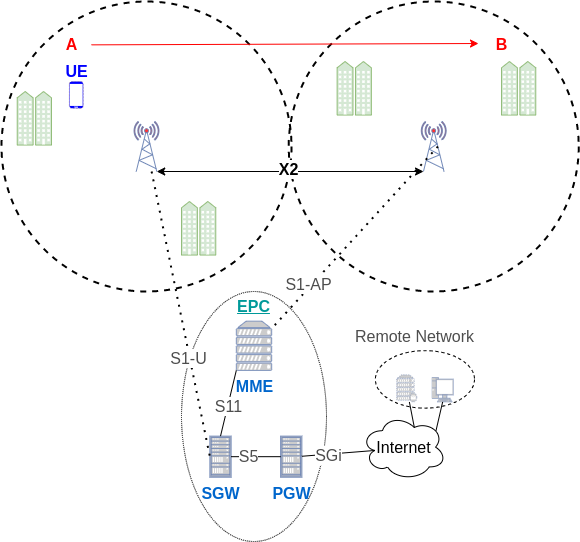 |   

<a id='fig1'><p style="text-align: center;"><b>[Figure. 1: A sample topology for visualizing X2-based handover.](#fig1)</b></p></a> 

We will use some variations of this sample topology for different tasks in the lab.


### 1.2 Cellular Parameters 

In this lab, we will consider a set of parameters for evaluating the performance of the handover process. The designed tasks intend to explore the following parameters and their impact on the performance parameters: 

- <b> Transmit Power of eNBs</b> 
Different values of transmit power will dictate the range or coverage of eNB in any particular direction. In this lab, we will utilize omnidirectional antennas to have uniform coverage in all directions. 

- <b> Cellular Environment Model (Clutter such as buildings) </b> 
We use multi-story buildings designed in the ns-3 simulation environment to enable the utilization of different channel models. These channel models cater for the channel distortions like reflection, scattering, absorption and propagation of radio signals between UE and eNBs.

- <b> Bandwidth and EARFCN Allocation at eNB</b> 
Different levels of bandwidth can be available in different eNBs for utilization by UE services. This has been modeled along with the possibility to allocate different EARFCNs (E-UTRA Absolute Radio Frequency Channel Number) to different eNBs in order to study the impact due to inter-cell interferences during handover process. 
<br> 

### 1.3 Performance Measurement Parameters 

<p style='text-align: justify;'> We will observe 3 parameters to measure the performance of the received signal at the users during the simulation. These are stated below in <a id='table1'>Table. 1</a> along with their respective ranges for reference. </p>  

| Connectivity | RSRP (dBm) | RSRQ (dB) | SINR (dB) | 
|--------------|--------------------|---------------------|-----------| 
| <code style="background:lime;color:black">Excellent</code>    | <code style="background:lime;color:black">>= -80 </code>            | <code style="background:lime;color:black">>= -10 </code>              | <code style="background:lime;color:black">>= 20 </code>     | 
| <code style="background:lightsalmon;color:black">Good</code>          | <code style="background:lightsalmon;color:black">-80 to -90</code>         | <code style="background:lightsalmon;color:black">-10 to -15</code>          | <code style="background:lightsalmon;color:black">13 to 20</code> | 
| <code style="background:coral;color:black">Medium</code>       | <code style="background:coral;color:black">-90 to -100</code>        | <code style="background:coral;color:black">-15 to -20</code>          | <code style="background:coral;color:black">0 to 13</code>   | 
| <code style="background:black;color:white">Weak</code>         | <code style="background:black;color:white"><= -100</code>            | <code style="background:black;color:white">< -20</code>               | <code style="background:black;color:white"><= 0</code>      | 
<p style="text-align: center;"><b><a id='table1'>Table. 1: Reference connectivity state for different ranges. </a></b></p> 

<b>Note:</b> The values for these parameters are negative and mathematically -70dBm is considered better than -80dBm.<br> 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <a id='task1'> 2. Analyzing Mobility and Handovers in LTE </a> 
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
This section introduces the process and mechanics of handover (HO) in LTE. A UE reports certain measurements for RSRP, RSRQ and SINR in the form of periodic measurement reports to the serving eNB. These reports also include prospective neighbor cells with pre-existing neighbor relations with the serving eNB. There are observable events A1, A2, A3, A4, and A5 described in <a id='table2'>Table. 2</a> and shown in <a id='fig2'> [Figure. 2](#fig2) </a>. These measurement reports from the UE generated for the eNB include two values: one for the serving cell and the other for the neighboring cells. The eNB utilizes the available handover algorithms to assess the events A1-A5 to decide the necessity of the handover.  

| Event | Description| 
|--------------|--------------------| 
| **A1**   | Serving cell becomes better than a defined threshold | 
| **A2**   | Serving cell becomes worse than a defined threshold | 
| **A3**   | Neighbor cell becomes better than serving cell by an offset factor (<b>hysteresis</b>) | 
| **A4**   | Neighbor cell becomes better than a defined threshold | 
| **A5**   | Serving cell becomes worse than threshold1 and neighbor cell becomes better than threshold2 | 

<p style="text-align: center;"><b><a id='table2'>Table. 2: Handover events in LTE. </a> (Source <a href="#References">[2]</a> )</b></p> 

The relationship between these so measurement events segregates different decision-making moments before, during and after the HO process in LTE. Events A2, A4 and A3 are utilized mainly for the HO based on the actual algorithm implementation. We will consider A2 and A4 events in order to perform finely tuned and best performing HOs. 
 
| | 
|---| 
|![lab5-ho-mechanics2.png](Figures/lab5-ho-mechanics2.png)|   

<a id='fig2'><p style="text-align: center;"><b>[Figure. 2a: Events A1-A5 for a 2-cell scenario. (RSRQ vs Time)](#fig2) (Source <a href="#References">[3]</a> )</b></p></a> 
    
### 2.1 Initiation of Handovers in LTE
Hysteresis and time-to-trigger (TTT) are two critical characteristics in LTE (Long-Term Evolution) handovers that help to improve network performance and eliminate needless handovers.

#### 2.1.1 Hysteresis
Hysteresis is a threshold concerning A3 event that establishes the difference in signal intensity between the serving and target cells prior to initiating a handover. It is used to avoid unwanted handovers by requiring a particular amount of signal strength differential before starting a HO. This threshold is used to prevent the mobile device from moving between cells owing to slight signal strength variations. Hysteresis requires a particular threshold of difference in signal intensity before initiating a HO, reducing the incidence of needless handovers.
    
| | 
|---| 
|![lab5-ho-hyst-offset.png](Figures/lab5-ho-hyst-offset.png)|   

<a id='fig2'><p style="text-align: center;"><b>[Figure. 2b: Hysteresis and TTT in Handovers. (RSRQ vs Time)](#fig2) (Source <a href="#References">[4]</a> )</b></p></a>
#### 2.1.2 Time-to-Trigger (TTT)
The time to trigger is commonly measured in milliseconds (ms) and is used to ensure that handovers are begun as soon as possible but not too soon.The "time to trigger" is the period between when a mobile device detects a stronger signal from a destination cell and when the device initiates a handover to the target cell. The time to trigger is commonly measured in milliseconds (ms) and is used to ensure that handovers are begun as soon as possible but not too soon.


In conclusion, hysteresis and TTT are two critical handover characteristics utilized in LTE to eliminate needless handovers, increase network performance, and lengthen the battery life of mobile devices. We utilize the <u>following values for hysteresis and TTT</u> in this lab:

- <b>Hysteresis = 2dB</b>
- <b>Time-to-Trigger = 16ms</b>

### 2.2 Thresholds in the Handover Process

<b>A1</b>: The threshold for A1 event is defined by the Serving cell as a measurement threshold. This threshold can be based on variou criteria, such as RSRQ or RSRP. When the RSRQ or RSRP decreases below the predefined threshold, the Serving cell will start looking for a suitable target cell for handover.

<b>A2</b>: The threshold for A2 event is also a measurement threshold. The Serving cell measures the RSRQ or RSRP of neighboring cells and compares them to the threshold. If the measurement reports of neighboring cells exceed the threshold, the Serving cell selects a target cell for handover.

<b>A3</b>: The threshold for A3 event is the Handover Margin. It is the difference between the measurement report of the Serving cell and the Target cell. The Serving cell will initiate a handover to the target cell only if the Handover Margin is positive.

<b>A4</b>: The threshold for A4 event is the Handover Success Rate. It is the probability that the Target cell will accept the handover request. The Serving cell will send the Handover Request to the Target cell only if the Handover Success Rate is above a predefined threshold.

<b>A5</b>: The threshold for A5 event is the Time-to-Trigger. It is the time interval between the detection of a handover trigger (A1 event) and the sending of the Handover Command to the mobile device. The Time-to-Trigger should be less than the predefined threshold to ensure a smooth handover process.

The thresholds play a critical role in the handover process as they help ensure that the handover is performed efficiently and seamlessly. The thresholds are predefined by the network operator and can be adjusted based on network conditions to optimize the handover performance.

## 3. <a id='task1'> <span style="color:red"> *Task#1: Assessing the need for a HO* </span></a> 
This task will consider a single eNB scenario as in the previous labs in order to understand the actual requirement in cellular networks for a handover. We will simulate this RAN topology to understand the behavior of mobile UE as it moves past the coverage of the eNB.

### 3.1 Designing a RAN topology 
The topology design follows the same basic steps from lab0 starting from accessing the react app, designing and saving the topology. Kindly utilize the blueprint provided in <a id='fig3'> [Figure. 3](#fig3)</a> to design the topology where the actual location of eNB and UEs is not important if the users are inside the coverage area of eNB. The <b>eNB transmit power</b> must be chosen as <b> 40dBm</b> for this task.    
  
| | 
|---| 
|![lab5-task1-top.png](Figures/lab5-task1-top.png) |   
<a id='fig3'><p style="text-align: center;"><b> Figure. 3: A simple mobility example.</b></p></a> 
 
> <b>Adding Mobile UE</b>: To add a mobile UE, follow the steps as shown below: 
> - Click on 'Add mobile UE path' to place the UE 
> - Click on 'Add mobile UE path' to get the starting point of the mobile UE path labeled <b><span>&#9312;</span></b>. 
> - Click on 'Add mobile UE path' to get the next point of the mobile UE path labeled <b><span>&#9313;</span></b>. (and so on) 

### 3.2 Simulate the designed topology in ns-3 
The python code in <b>lab5-init.py</b> is provided to convert the design topology in a form acceptable to the SEM and ns-3 simulation engines. Moreover, some relevant command line arguments are also passed to the ns-3 program implementing the given topology in order to observe the results and status of the simulation.  These parameters include the information extracted from the topology in <a id='fig3'> [Figure. 3](#fig3)</a> about location, transmit power from the react interface as well as the selection parameters for collecting different performance parameters like (RSRP, RSRQ, etc.) and/or connection setup logs. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate. 
<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files) 
- <b>enable handover = yes or no</b>  <-- Select no
- show topology (yes or no) 

In [5]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
mobileUE1



List the simulation to run:  mobileUE1


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 yes


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image mobileUE1.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:02<00:00,  2.16s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:02<00:00,  2.33s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:02<00:00,  2.21s/simulation]

Simulation 3 finished!


### 3.3 Pre-processing simulation results 
The python code in <b>lab5-DataPre.py</b> is provided to process and clean the obtained data from ns-3 simulations. The following set of variables provides the state of the collected data from the ns-3 simulations. 

<ul> 
    <li><b>Before</b> data cleaning and formatting</li> 
    <ul> 
      <li>result_signalpower (for RSRP, RSRQ results) </li> 
      <li>result_sinr (for SINR results) </li> 
      <li>result_throughput (for SINR results) </li> 
    </ul> 
  </li> 
</ul> 

In [6]:
%run -i 'Modules/lab5-dataPre.py'

In [7]:
# to visualize the contents of the metric variables
display(res_signalpower)
display(res_sinr)
display(res_throughput)

time   sig_power  sig_quality      ue
user11 0    0.4 -124.471338    -3.966549  user11
       1    0.6 -124.471338    -3.966549  user11
       2    0.8 -124.471338    -3.966549  user11
       3    1.0 -124.471338    -3.966549  user11
       4    1.2 -124.471338    -3.966549  user11
       5    1.4 -124.471338    -3.966549  user11
       6    1.6 -124.471338    -3.966549  user11
       7    1.8 -124.471338    -3.966549  user11
       8    2.0 -124.471338    -3.966549  user11
       9    2.2 -124.471338    -3.966549  user11
       10   2.4 -124.471338    -3.966549  user11
       11   2.6 -124.471338    -3.966549  user11
       12   2.8 -124.471338    -3.966549  user11
       13   3.0 -124.471338    -3.966549  user11
       14   3.2 -124.471338    -3.966549  user11
       15   3.4 -124.471338    -3.966549  user11
       16   3.6 -124.471338    -3.966549  user11
       17   3.8 -124.471338    -3.966549  user11
       18   4.0 -124.471338    -3.966549  user11
       19   4.2 -124.471338    -3.966549  user11
       20   4.4 -124.471338    -3.966549  user11
       21   4.6 -124.471338    -3.966549  user11
       22   4.8 -124.471338    -3.966549  user11
user12 0    0.4 -117.771602    -4.168951  user12
       1    0.6 -115.157267    -3.134662  user12
       2    0.8 -114.697904    -3.121793  user12
       3    1.0 -116.719892    -3.189366  user12
       4    1.2 -119.980497    -3.383411  user12
       5    1.4 -123.371068    -3.783981  user12
       6    1.6 -126.478813    -4.460298  user12
       7    1.8 -129.233224    -5.424745  user12
       8    2.0 -125.260964    -4.260466  user12
       9    2.2 -126.145278    -4.359177  user12
       10   2.4 -127.937409    -4.911865  user12
       11   2.6 -129.555430    -5.554421  user12
       12   2.8 -131.027779    -6.267319  user12
       13   3.0 -132.377077    -7.029392  user12
       14   3.2 -133.621394    -7.820973  user12
       15   3.4 -134.719178    -8.584113  user12
       16   3.6 -134.976608    -8.770212  user12
       17   3.8 -134.976608    -8.770212  user12
       18   4.0 -134.976608    -8.770212  user12
       19   4.2 -134.976608    -8.770212  user12
       20   4.4 -134.976608    -8.770212  user12
       21   4.6 -134.976608    -8.770212  user12
       22   4.8 -134.976608    -8.770212  user12

time      sinr      ue
user11 0     0.261214  6.085239  user11
       1     0.262214  6.085239  user11
       2     0.263214  6.085239  user11
       3     0.264214  6.085239  user11
       4     0.265214  6.085239  user11
...               ...       ...     ...
user12 4734  4.995214 -4.420032  user12
       4735  4.996214 -4.420032  user12
       4736  4.997214 -4.420032  user12
       4737  4.998214 -4.420032  user12
       4738  4.999214 -4.420032  user12

[9478 rows x 3 columns]

time  tput      ue
user11 0   0.00   NaN  user11
       1   0.05   NaN  user11
       2   0.10   NaN  user11
       3   0.15   NaN  user11
       4   0.20   NaN  user11
...         ...   ...     ...
user12 95  4.75   0.0  user12
       96  4.80   0.0  user12
       97  4.85   0.0  user12
       98  4.90   0.0  user12
       99  4.95   0.0  user12

[200 rows x 3 columns]

The results will be available in the following variables for further processing after completion of a ns-3 simulation, 
- **result_signalpower** provides information regarding received signal power and signal quality for cellular users. 
- **result_sinr** provides information regarding received signal power and interference experienced by the cellular users. 
- **result_throughput** provides information regarding averaged user throughput in downlink and uplink for cellular users.

In addition, we also have the variables named <b>campaign</b> and <b>campaign1</b>which are from the `lab5-init.py` containing the simulation objects for the ns-3 simulations. We use them here to obtain the results using the simulation objects. 

> Note: Users are identified in the simulations by their unique <b>RNTI</b> values in the current serving cell. For example, a user ID of <u>user21</u> identifies that the user has an RNTI of <u>1</u> and is connected to the cell with id <u>2</u>. Moreover, these values are subject to change in different simulation runs.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='task1'> <span style="color:purple"> <b>Important:</b> </span></a>
The users connected to a cell ID = 1 will have the format user1x where x stands for different RNTIs but the cell ID is fixed for the cell. The following examples identify some of the observed user ID values:

<u><b>user11 and user12</u></b> show that there are 2 users with RNTI = 1 and 2 connected to cell ID = 1.

<u><b>user11 and user21</u></b> show that there is 1 user with RNTI = 1 and that there are two cells with cell ID = 1 and 2. (This is the most observable one in this lab)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.4 Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this from the extracted variables.

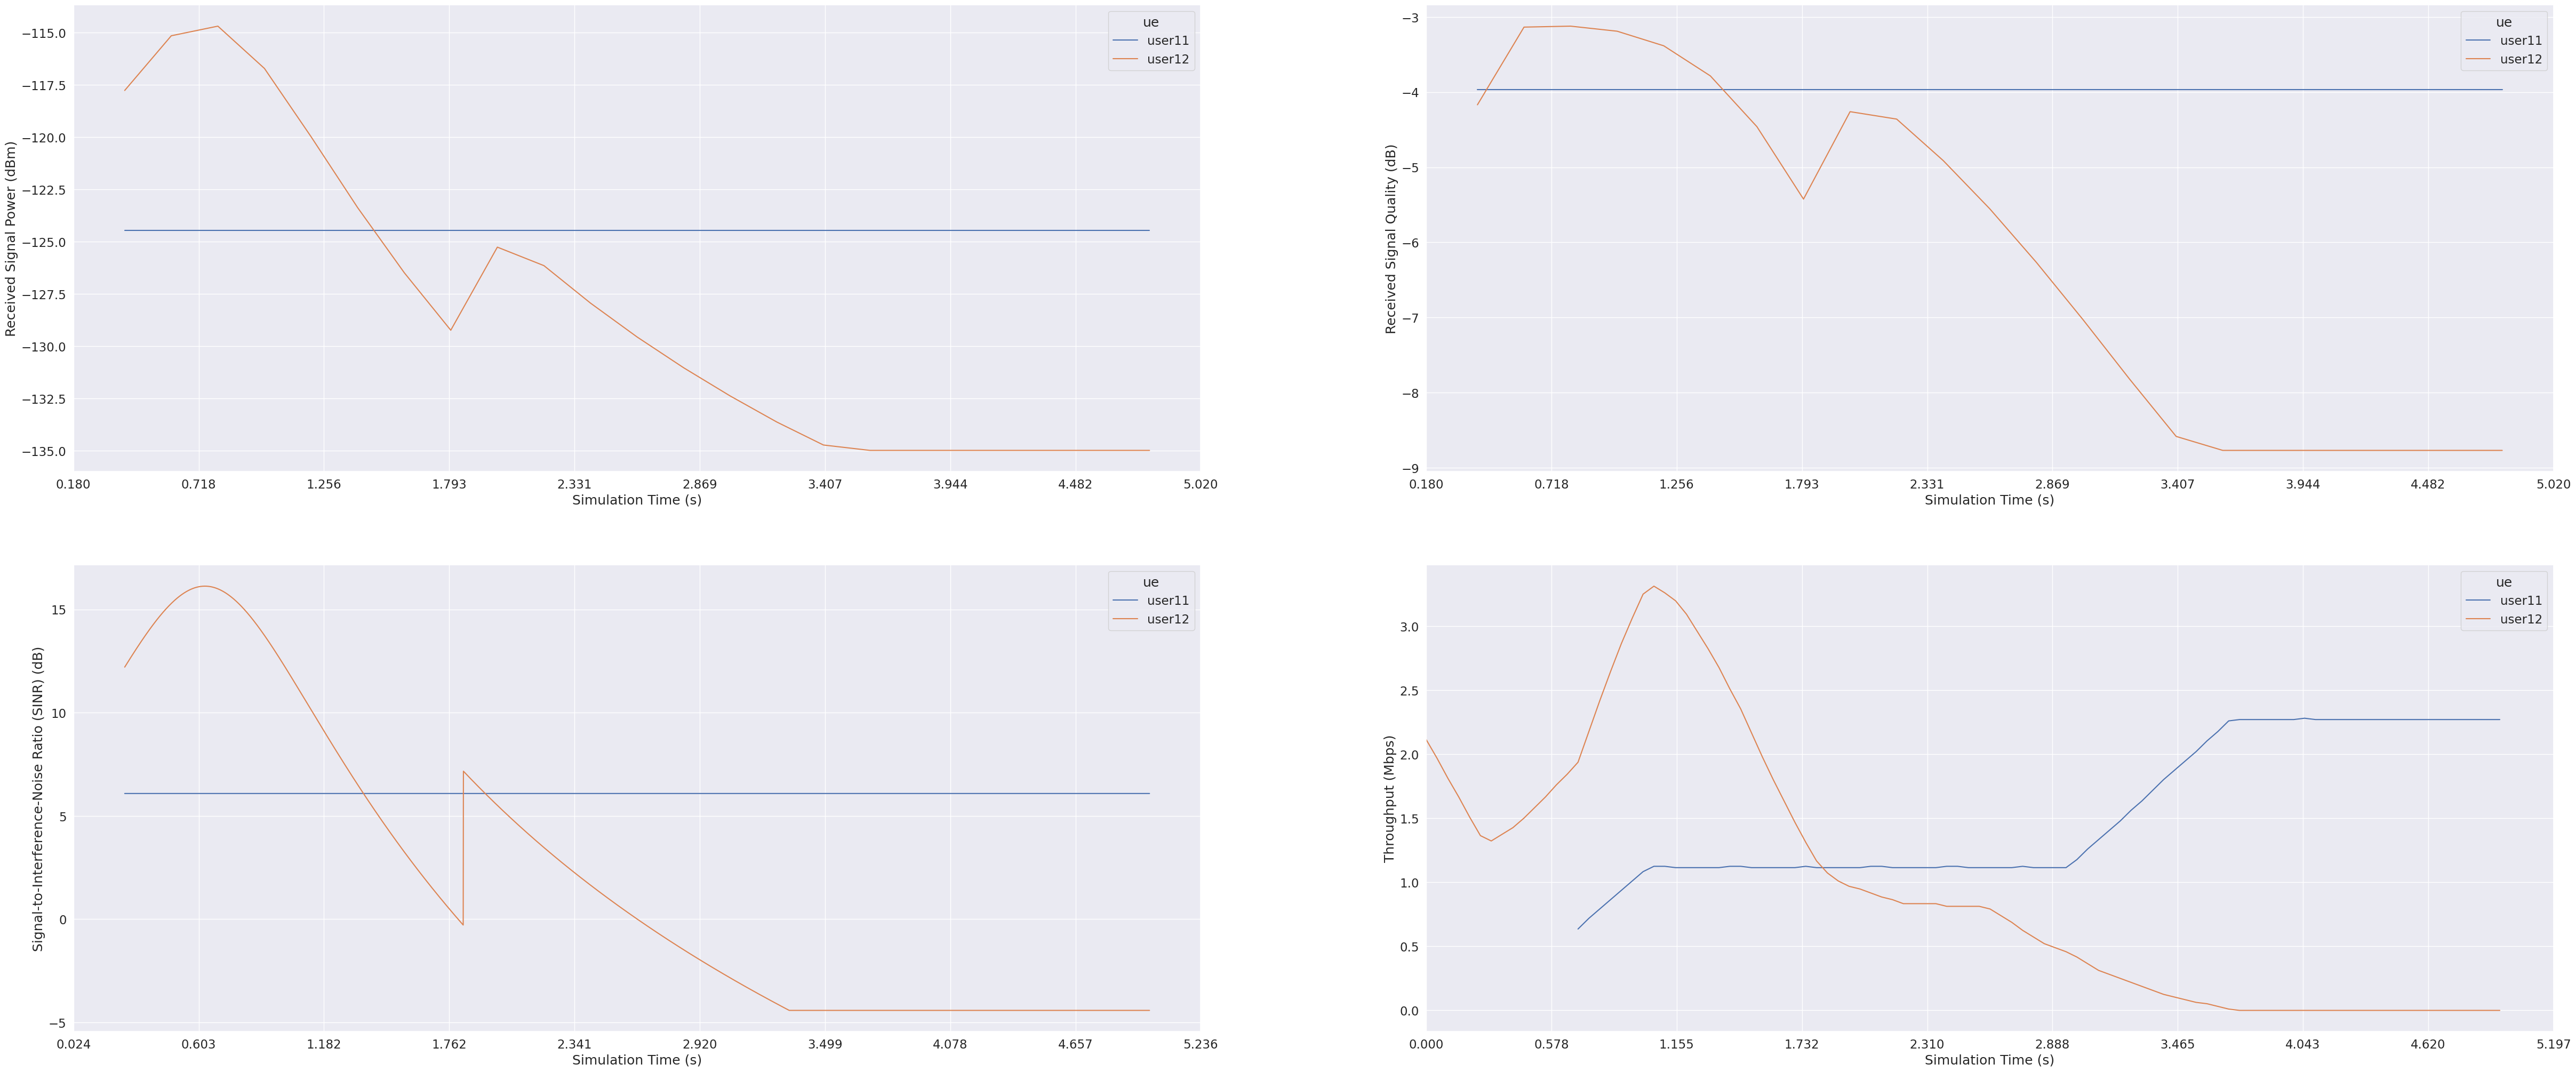

In [9]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))

plt.show()

sns.reset_orig()


### 3.5 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the cell. The impact on the static UE is negligible in the simulated LTE network. However, there are key points to be observed regarding the behavior of the static and mobile UE. These aspects are covered by the following exercises: 

### <u>Exercises</u>

#### Q3.5.1a: Explain the observed values of RSRP\RSRQ and SINR for the mobile UE? How does the values correlate to the experienced throughput for the mobile UE and explain how this correlated to the UE’s movement.

<b><u>Answer:</u></b>
First the UE is closing in a little bit on the eNB, we can see the values for RSRP, RSRQ and SINR go up. Then, the UE moves away from the eNB and the values drop off. At one point around 1.8 seconds into our simulation all graphs with the exception of throughput jump up. This is probably because the eNB changes the modulation scheme so that the UE in the outer brim of eNB coverage still can receive an okay signal. Connected to the graphs over RSRP, RSRQ and SINR we see that the throughput for the mobile UE relates to the other graphs. The throughput is highest when the UE is closest to the eNB, but sinks the further away the UE moves. At the point where the other graphs jump, the throughput stays put for a little moment. The throughput would not jump up as we switch to a lower modulation scheme allowing less bits per symbol to be transmitted at the same time, but ensures a more stable signal. After a little while the throughput also falls to zero as well as the other graphs when the UE is outside signal range.


#### Q3.5.1b: Is there something unexpected in the observed values for RSRP\RSRQ and SINR? Identify the problem if it exists?
> Hint: Consider the propagation losses during transmission as a factor to detect if a problem exists. 

<b><u>Answer:</u></b>
We identified a peak in the SINR, RSRP and RSRQ graphs. Which may be considered unexpected but we think this is because the eNB switches to a lower modulation scheme as the signal become to bad for the UE to receive a high modulation signal. This switch allows the UE to stay connected and have a smaller throughput for a little while longer

We tried to figure out what the peaks where, and our student assistant told us it is a glitch in the simulation. It happens when the UE crosses the border between to cells.

#### Q3.5.2a: What type of channel characteristics and impairments causes the observed values of signal power, signal quality and SINR for the static user? 

> Hint: A easy to understand reference for understanding channel impairments is the [link] (https://www.tutorialspoint.com/wireless_communication/wireless_communication_channel_characteristics.htm). Some example of these impairments are fading, interference, propagation losses.

<b><u>Answer:</u></b>
For the static user we see constant values for the signal power, signal quality and SINR. This doesn't make sense in a real world scenario as there is many factors interfering the signal.
There would most likely be other sources of noise like phones inside the range having their own signals that would interfere with the static UE. Objects might also move in the way of the signal such as cars causing shadowing. The simulation does not include any other objects for the signal to bounce off and therefore we wont see any multipath propagation in our result.
We can see that when the mobile UE moves out of range the static UE gets more througput as it can use more of the free timeslots in the eNB.
In the real world there would also be power fluctuations at the base station, but the simulation uses averaging so it does not influence the results


#### Q3.5.2b: What type of channel characteristics and impairmentsand impairments causes the observed values of signal power, signal quality and SINR for the mobile user? 

> Hint: A easy to understand reference for understanding channel impairments is the [link] (https://www.tutorialspoint.com/wireless_communication/wireless_communication_channel_characteristics.htm). Some example of these impairments are fading, interference, propagation losses.

<b><u>Answer:</u></b>
When the UE moves it might go behind a building or some other obstacle that causes propagation loss. If the UE stops at a point of destructive interference this might cause the perceived signal to disappear from the UE, but when it moves again reappear (deep fading).


#### Q3.5.3: When the UE moves through the cell it has a variable signal from the eNB. Why/what mechanics causes a signal with variable strength to result in a variable throughput? Relate the theory to the measured results in you answer.

<b><u>Answer:</u></b>
A higher strength of the signal allows more bits to be transferred per symbol transmitted this in turn giving us a high throughput. When the signal strength is weak, the signal-to-noise ratio is low, which makes it more difficult for the receiver to distinguish the signal from the noise. As  a result, errors can occur in the transmission lowering the overall throughput as we must switch to a lower modulation scheme.


---
---
### <span style="color:green"> Milestone 1 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 4. <a id='task1'> <span style="color:red"> *Task#2: Performance Assurance using Handovers* </span></a>
In this task, we will add an additional eNB to the topology utilized in <b> <a id='task1'>Task 1</a></b>. This ensures that the mobile UE has probability to switch over to a new eNB after it leaves the first eNB. In addition, this additional eNB provides us with an opportunity to study the mechanics of the handover process in a multi-cellular environment. Only 2 neighboring eNBs are normally required to perform X2-based handovers and the process is extendable to any number of pre-existing neighboring cells. 

In this task, we will observe the performance of a mobile user along a pre-defined path across a 2-cell scenario. The observations are made in 2 steps: firstly, by disabling the **X2** interface in order to disable 
X2-based HOs effectively, and, secondly by enabling **X2** interface to allow normal X2-based HO. 


### <a id='scenario1'> <span style="color:blue"> *Scenario 1: Handover disabled (No X2 interface between eNBs)* </span></a>
We will start by creating a simple 2-cell radio access network (RAN) topology using the React application as show in <a id='fig4'>[Figure. 4](#fig4).
 

| |
|---|
|![lab5-task2-top.png](Figures/lab5-task2-top.png) |  
<a id='fig4'><p style="text-align: center;"><b>[Figure. 4: A multicellular mobility example.](#fig4)</b></p></a>We will start by creating a simple 2-cell radio access network (RAN) topology using the React application as show in <a id='fig4'>[Figure. 4](#fig4).


### 4.1 Simulate the designed topology in ns-3
Use the <b>lab5-init.py</b> and the <a id='fig4'>[Figure. 4](#fig4)</a> to design the topology using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- enable handover = <b>no</b>
- show topology (yes or no)
 

In [10]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
mobileUE2
mobileUE1



List the simulation to run:  mobileUE2


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 no


X2 will be disabled blocking HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image mobileUE2.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.21s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.26s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.17s/simulation]

Simulation 3 finished!


### 4.2 Pre-processing simulation results
The python code in <b>lab5-DataPre.py</b> is provided to process and clean the obtained data from ns-3 simulations. The following set of variables provides the state of the collected data from the ns-3 simulations.

<ul>
    <li><b>Before</b> data cleaning and formatting</li>
    <ul>
      <li>result_signalpower (for RSRP, RSRQ results)</li>
      <li>result_sinr (for SINR results)</li>
      <li>result_throughput (for SINR results)</li>
    </ul>
  </li>
</ul>

In [11]:
%run -i 'Modules/lab5-dataPre.py'

The following set of variables provides the state of the collected data from the ns-3 simulations.

<ul>
  <li><b>After</b> data cleaning and formatting
    <ul>
      <li>res_signalpower (for RSRP, RSRQ results)</li>
      <li>res_sinr (for SINR results)</li>
      <li>res_throughput (for SINR results)</li>
    </ul>
  </li>
</ul>

**Note:** Simply use <em>display(variable_name)</em> to view different available performance metrics.



In [13]:
# to visualize the contents of the metric variables
#display(result_sinr)
display(res_sinr)

time      sinr      ue
user11 0    0.261214  5.336542  user11
       1    0.262214  5.347736  user11
       2    0.263214  5.358913  user11
       3    0.264214  5.370072  user11
       4    0.265214  5.381213  user11
...              ...       ...     ...
user21 574  4.995214 -0.295319  user21
       575  4.996214 -0.295319  user21
       576  4.997214 -0.295319  user21
       577  4.998214 -0.295319  user21
       578  4.999214 -0.295319  user21

[4678 rows x 3 columns]

### 4.3 Visualizing the simulation results
At this point, the results are available to be viewed using any python plotting library. We utilize seaborn to do this from the extracted variables.

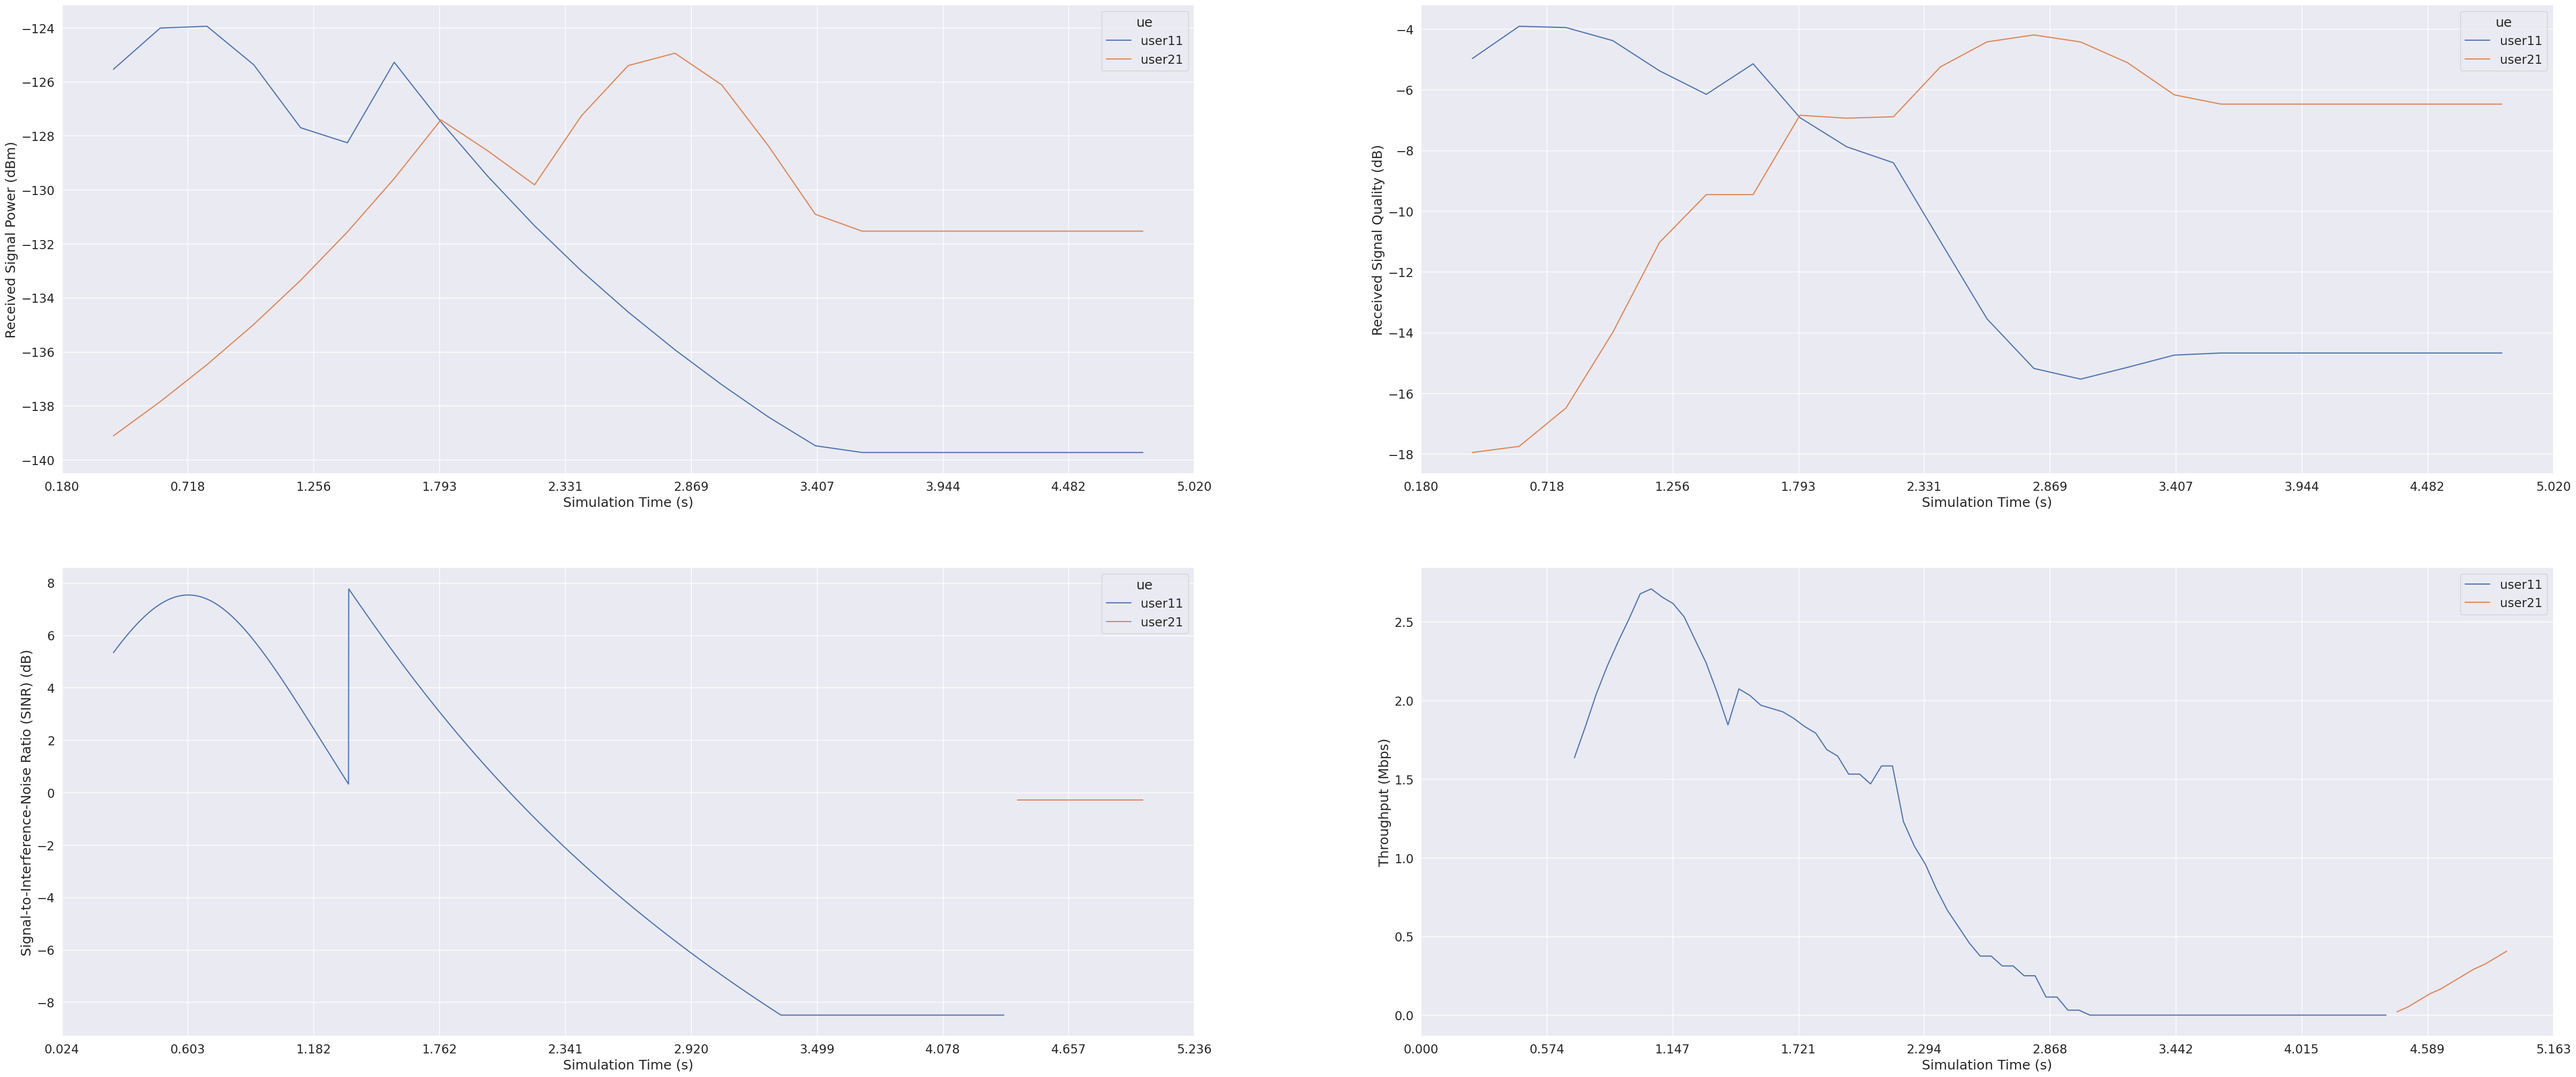

In [14]:
# for the plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 4.4 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell in absence of X2 interface. Keep in mind that other types of handovers are possible even if X2 link is not available. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q4.4.1: What type of handover can be conducted in the absence of X2 connection between two eNB’s? Explain if this handover is performed in this simulation?
> Hint: The handover can still be done using EPC...

<b><u>Answer:</u></b>
When there is no X2 connection between two eNBs, the handover can still be conducted using S1-based handover. S1-based handover involves transferring the UE's session information from the source eNB to the target eNB through the S1 interface, which is the primary interface between the eNB and the EPC. During an S1-based handover, the source eNB releases the radio resources and notifies the target eNB through the MME Wto allocate radio resources for the UE to continue the ongoing communication. The UE then performs a handover to the target eNB, which resumes the communication session.
S1 handover is generally slower which gives a good indication that it is in fact an S1 handover.

#### Q4.4.2: What are the some disadvantages and possible consequences of performing this type of handovers ,specified in Q4.4.1, instead of X2 handovers?

<b><u>Answer:</u></b>
S1 handover involves more signaling messages exchanged between the eNodeBs and the EPC network, which can increase the signaling load congesting the network and reduce its capacity. Therefore the consequence is degraded quality of service for the UE. Having more signalling messages needed for a handover also increases the time the handover takes. The S1 interface is less scalable, as it includes the same node for many eNBs. Worse scalability means that a lower total number of users may be served.

#### Q4.4.3: What may the consequences be if the values of time-to-trigger and hysteris are set too low or too high? Discuss the consequences of all 4 conditions?

<b><u>Answer:</u></b> 
## hysteris/time-to-trigger
### low/low - May cause the UE to do a lot of handovers in a short period of time since the perceived values in a real world scenario would fluctuate a bit having the threshold to low would lead to unnecessary handovers.
### low/high - The low hysteris would cause the UE to start handovers often at the edge between cells, but considering the high TTT some of the handovers might be stopped since the source eNB suddenly gets a better signal. Having the phone considering handovers often might lead to high load and draining the battery.
### high/low - If you have a high hysteris and low TTT the handover decision would be taken once you have a way better signal to the target than the source, having the low TTT also shortens the time to wait considering that the UE already is a good way into the new cell.
### high/high - If you also have high TTT with the high hysteris the UE may stay connected to the source eNB for too long while the target gives a better signal. Having these values too high might also make the UE lose connection to the source eNB before the target takes over making the handover impossible and making the UE need to reconnect to the radio network in the target eNB.


#### Q4.4.4: Which measurement events from <a id='fig2'> [Figure. 2](#fig2) </a> are observed in the simulation results? 
> Hint: Check RSRP\RSRQ graphs for observing these events. 

<b><u>Answer:</u></b>
We see A2, A3 and A4

* A2 - The measured power from the first base station reaches a threshold where the signal is so weak that the UE starts looking for other base stations to perform a handover.
* A3 - The measured signals cross over in power and quality, then the hysteresis needs to be met for a handover to occur.
* A4 - The handover happens and the second base station takes over control of the phone.
We dont see the A1 threshold because the UE starts within signalling range of the eNB. A5 also does not happen as the cells are placed close enough to not lose coverage between the cells.

### <a id='scenario2'> <span style="color:blue"> *Scenario 2: Handover enabled (X2 interface exists between eNBs)* </span></a>

This scenario covers the handover simulation for <a id='fig5'>[Figure. 5](#fig5)</a> using the designed topology in <b> <a id='scenario1'>Scenario 1</a></b> with X2 interface enabled. 

 

| |
|---|
|![lab5-task2-top.png](Figures/lab5-task2-top.png) |  
<a id='fig5'><p style="text-align: center;"><b>[Figure. 5: A multicellular mobility example.](#fig5)</b></p></a>



The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- enable handover = <b>yes</b>
- show topology (yes or no)

In [1]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
mobileUE2
mobileUE1



List the simulation to run:  mobileUE2


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 yes


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image mobileUE2.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.27s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.37s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.33s/simulation]

Simulation 3 finished!


In [2]:
%run -i 'Modules/lab5-dataPre.py'

In [4]:
# to visualize the contents of the metric variables
# display(res_signalpower)
# display(res_sinr)
# display(res_throughput.tail(20))

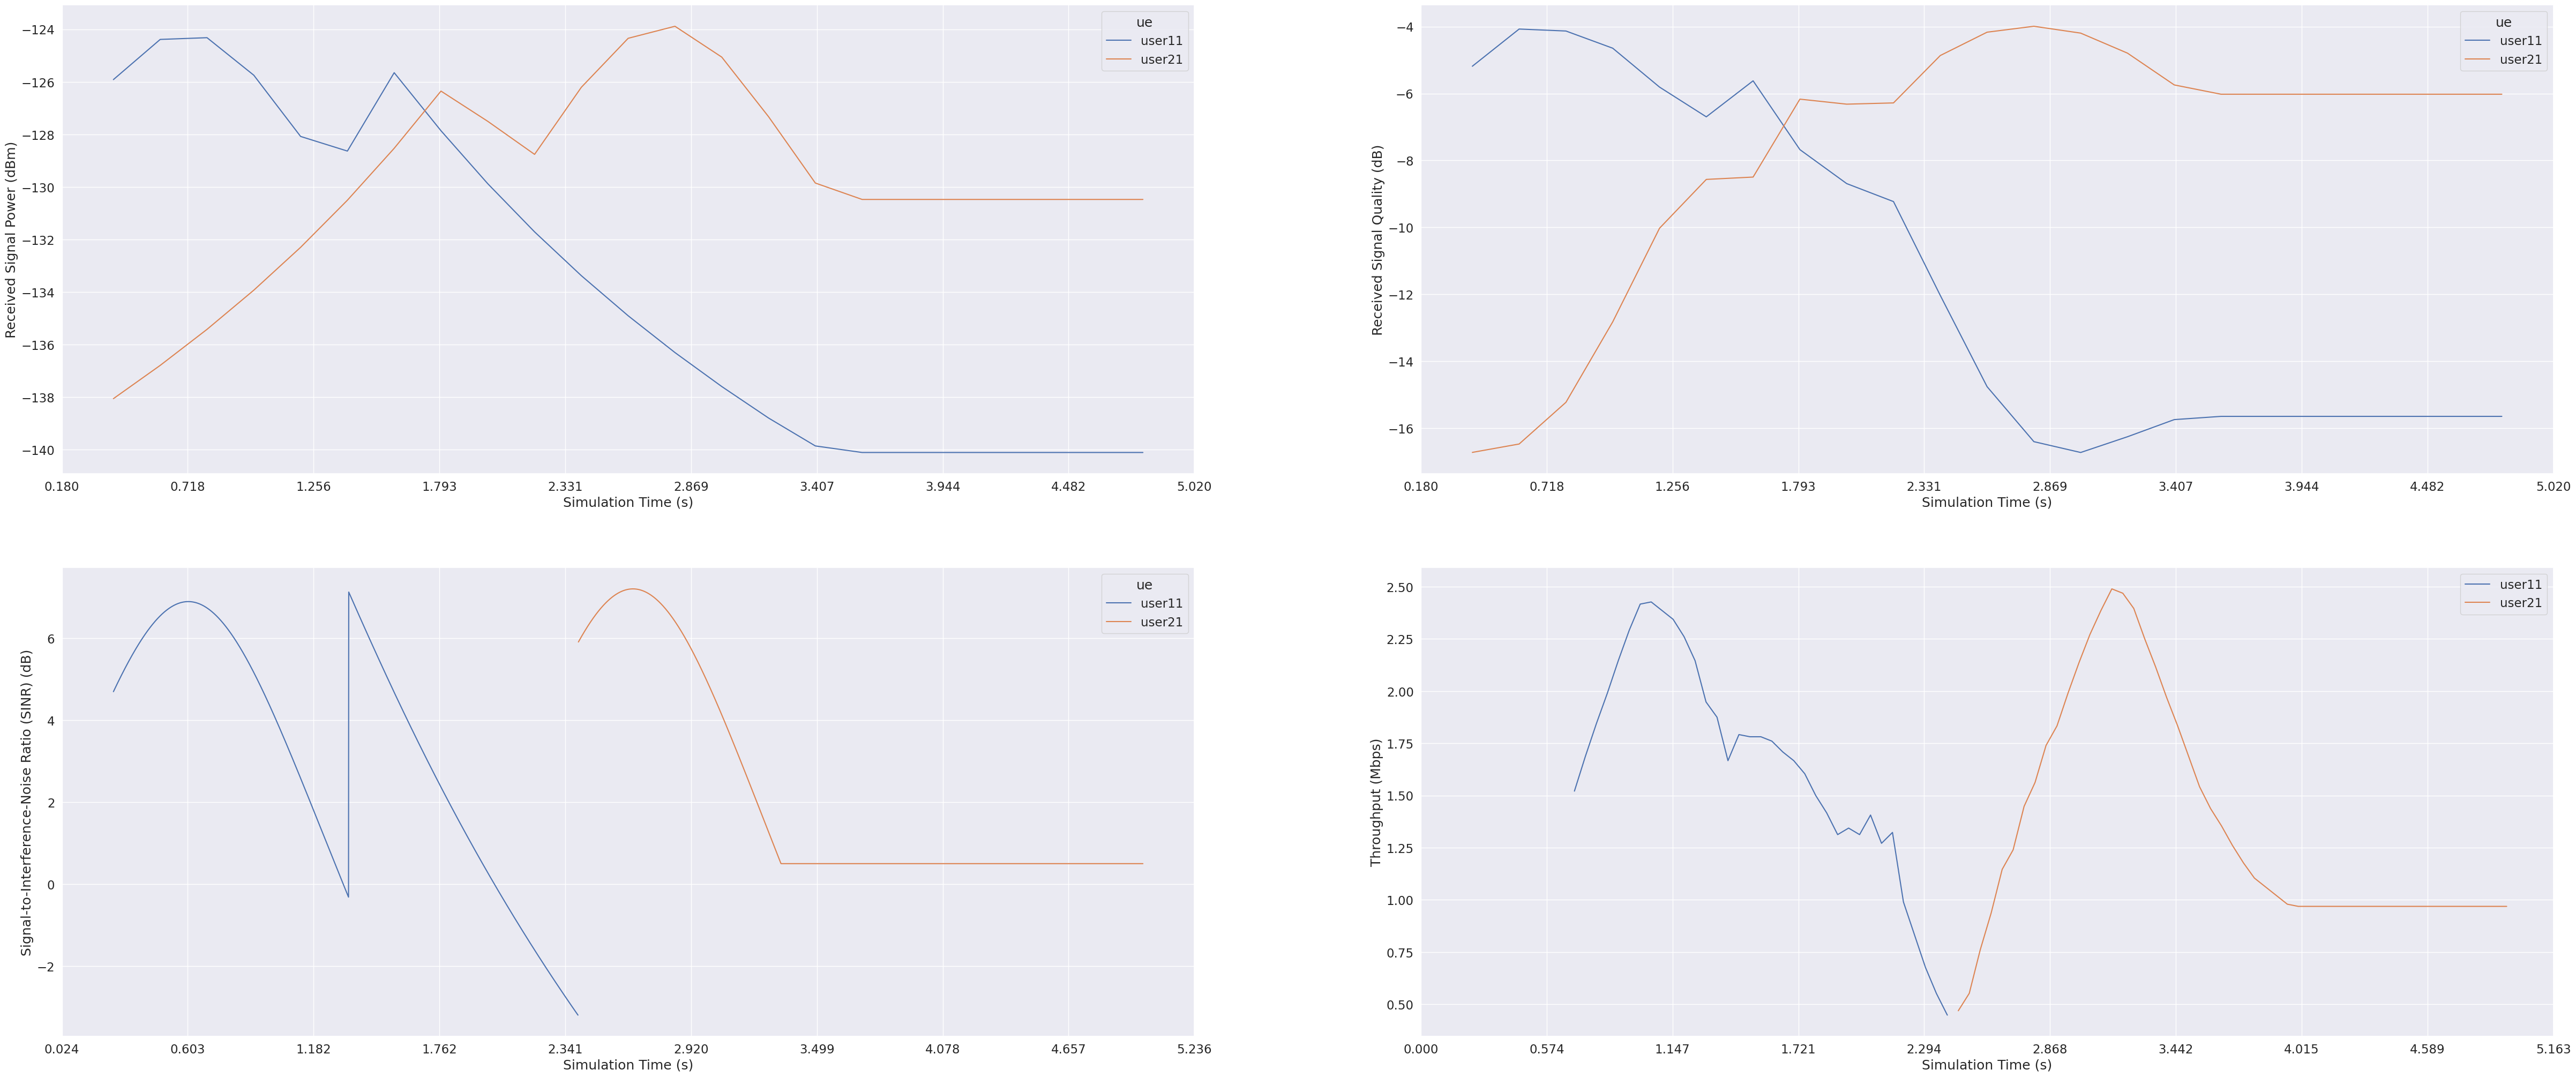

In [5]:
# for the plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 4.5 Results
The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell in presence of X2 interface. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q4.5.1: Compare the results of the throughput graph with the one obtained in the previous scenario, (4.3) with regard to the following: Disruption of traffic, service degradation, level of throughput, variance in throughput?

<b><u>Answer:</u></b>
In the S1 handover the UE goes far enough away from eNB1 after the handover thresholds are met, but because the handover is so slow the service gets disrupted and the throughput reaches zero before eNB2 takes over.
Meanwhile, the X2 handover happens so quickly that when the throughput on eNB1 almost reach zero the first time, the handover is performed and the throughput rises again on the eNB2 connection.


#### Q4.5.2a: What are possible causes that users may experience a disruption of service in scenarios where an handover should have been performed?

<b><u>Answer:</u></b>
The TTT is too slow, the serving eNB signal becomes so bad that the UE lose throughput before being handed to the next eNB, this could also happen when the S1 interface is used as we saw in the simulations above.
Congestion in the new cell may also be a factor.

#### Q4.5.2b: Explain the difference between hard and soft handover. Which type of handover is most susceptible to service disruption and why?

<b><u>Answer:</u></b>
In soft handover, a connection is made between the UE and the next eNB before the connection with the current eNB is broken.
On the other hand, in hard handover, the connection with the current eNB is broken before the connection with the next eNB is made.
Hard handover is generally more susceptible to service disruption because the UE loses connection to all eNB for a brief moment where it is not connected to any cell. Soft handover is generally always connected to atleast one eNB.

#### Q4.5.3: How are the S1 and X2 based handovers different from each other? When should each of them be utilized?

<b><u>Answer:</u></b>
* X2 handovers is intra MME and should be used if possible since it is faster and better. In the scenarios where the X2 interface is not present the S1 based handover will be utilized.
* S1 handovers are inter MME and has to be used in scenarios where the UE switches MME. For instance when switching MME areas, or going to a different generation network(ie. vertical handover or inter-RAT) as there is no X2 interface in these scenarios and hence the S1 handover needs to be used. In case of roaming inter-PLMN when visiting another operators network, even more than a S1 tunnel needs to be reestablished.


#### Q4.5.4: Find the time instance when A3 is triggered in <b><a id='scenario1'>Scenario 1</a></b> and <b><a id='scenario2'>Scenario 2</a></b>? Also specify the observed values at A3 event for RSRP, RSRQ and SINR for the serving and neighbor cells?
> Hint: Consider the hysteresis = 0 and check the RSRQ plot to determine the time instances.

<b><u>Answer:</u></b>
# Scenario 1: 1,793s
## Serving
- RSRP: -127
- RSRQ: -7
- SINR: 3
## Neighbour
- RSRP: -127
- RSRQ: -7
- SINR: --
# Scenario 2: 1,7s
## Serving
- RSRP: -126
- RSRQ: -5,5
- SINR: 3
## Neighbour
- RSRP: -128
- RSRQ: -8,5
- SINR: --

---
---
### <span style="color:green"> Milestone 2 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 5. <span style="color:red"> *Task#3: Impact of Channel and Clutter (Buildings etc.) on Handovers* </span>
This task deals with studying the impact of changing channel properties via the introduction of buildings in the radio environment. This change will lead to enhancement in effects of phenomenon including but not limited to signal reflection, absorption, scattering and loss due to the buildings. This also produces multi-path effects in the channel due to which signal takes multiple paths to reach the UE. The simulations cover two scenarios where a simple radio environment consisting of 2 eNBs and a mobile is considered in the absence and presence of buildings. 

Consequently, the communication path between UE and eNB will be either line-of-sight (LOS), non-line-of-sight (NLOS) or a hybrid combination of both modes. 

### <span style="color:blue"> *Scenario 1: Simulation without any buildings* </span>
The topology to be designed for this scenario is shown as follows:

| |
|---|
|![lab5-nobuildtask3-top.png](Figures/lab5-nobuildtask3-top.png) |  
<a id='fig6'><p style="text-align: center;"><b>[Figure. 6: A simple topology for HO without buildings.](#fig6)</b></p></a>


### 5.1 Simulate the designed topology in ns-3
Use the <b>lab5-init.py</b> and the <a id='fig6'>[Figure. 6](#fig6)</a> to design the topology using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

<b>Note:</b> The python code will display the saved topologies from the react app and we can choose any one of them to simulate.

<b>Also:</b> The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b>enable handover = yes</b>
- show topology (yes or no)

In [8]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
mobileUE2
5
mobileUE1



List the simulation to run:  5.1


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 y


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image 5.1.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.35s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.16s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.32s/simulation]

Simulation 3 finished!


In [9]:
%run -i 'Modules/lab5-dataPre.py'

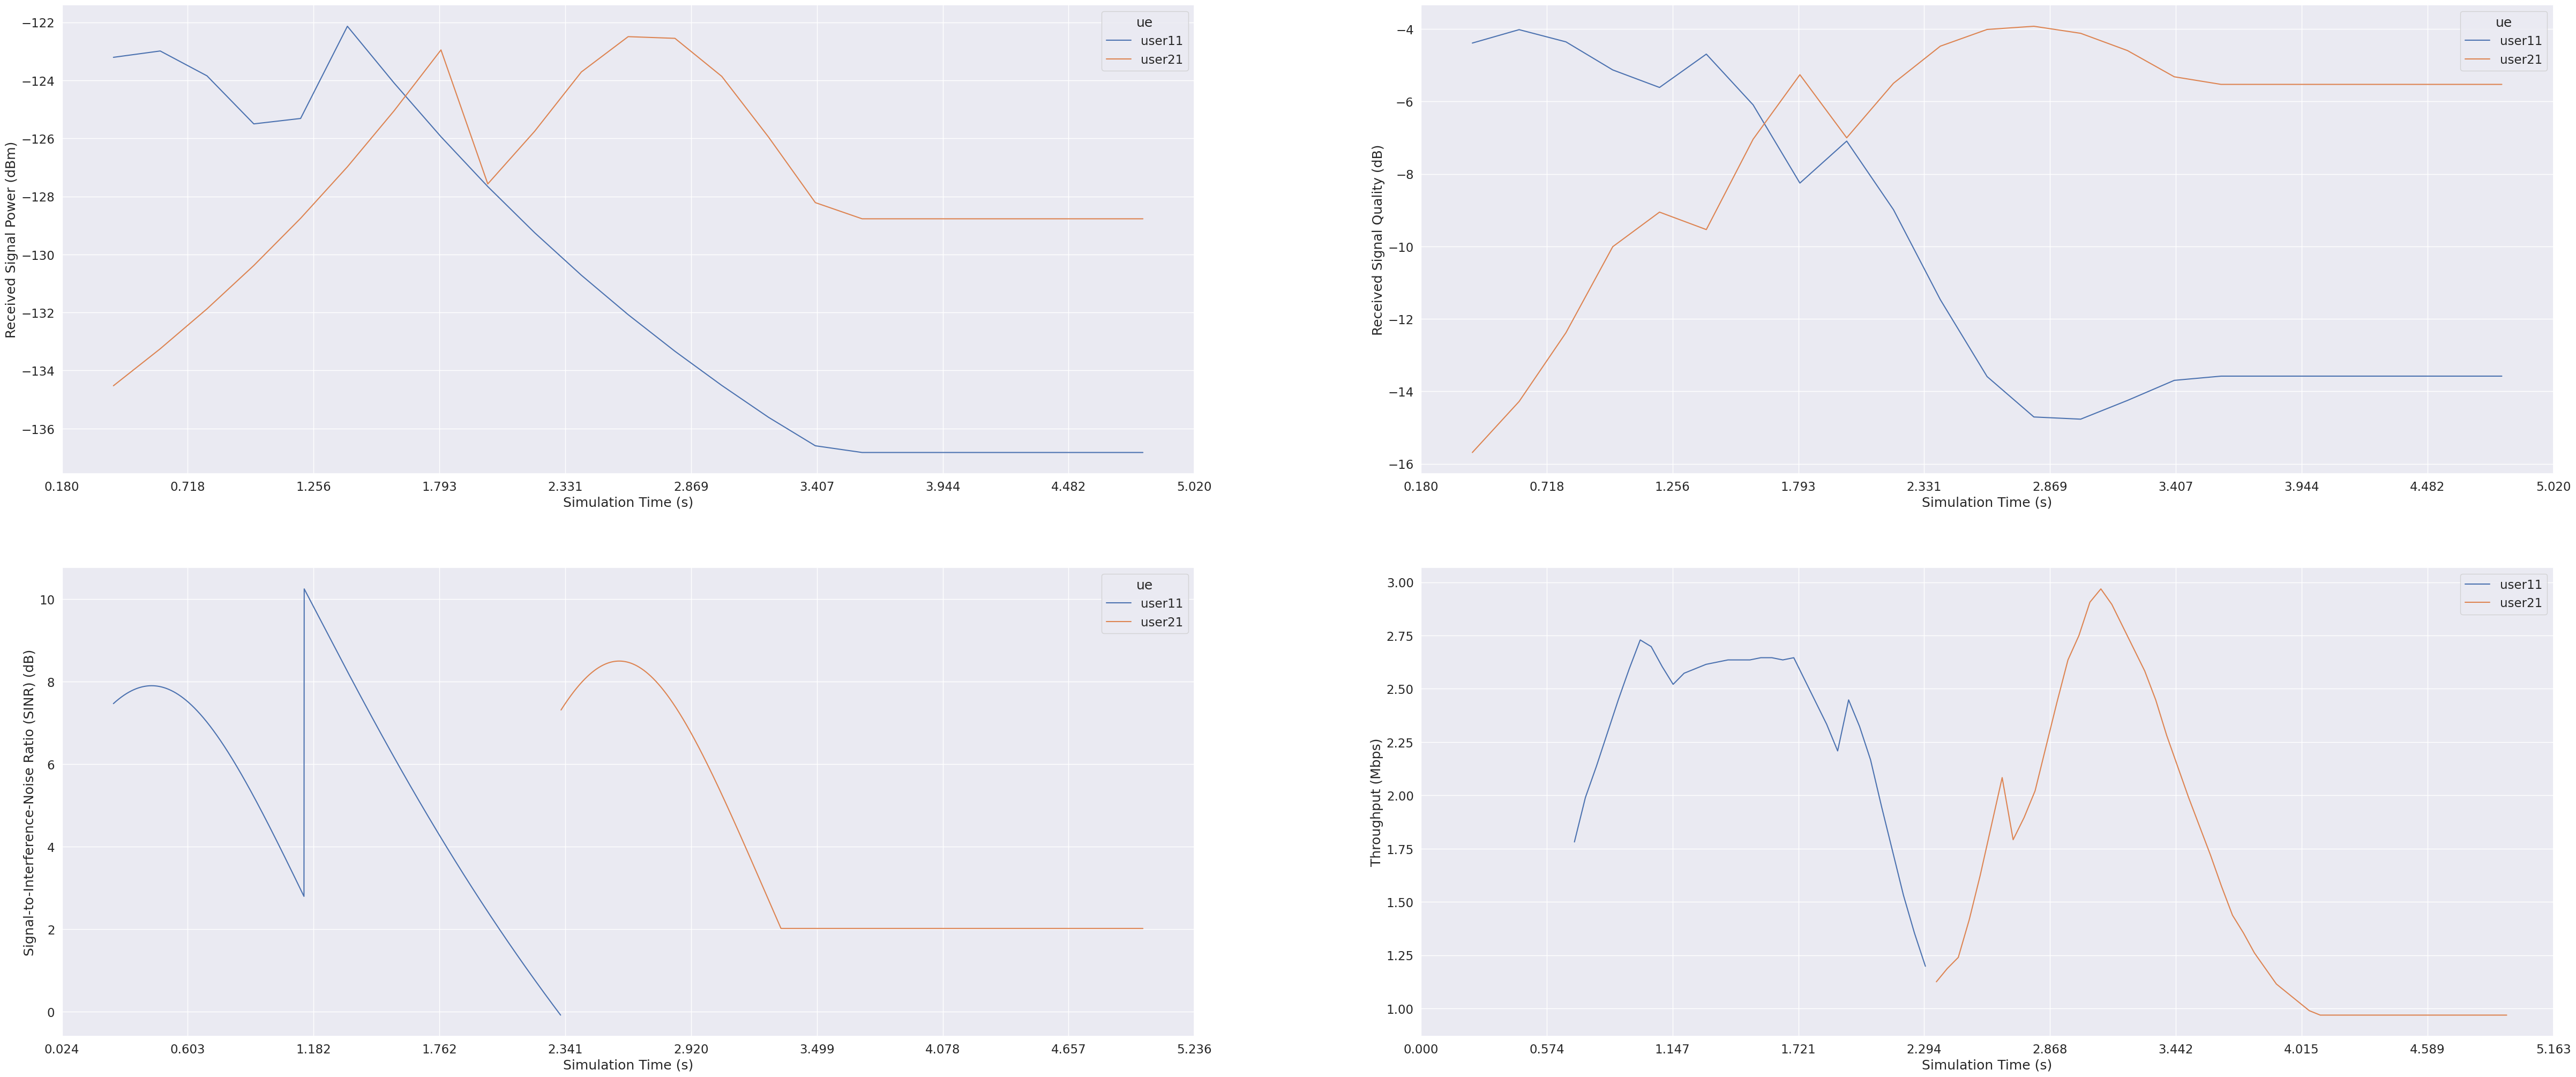

In [11]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### <span style="color:blue"> *Scenario 2: Simulation with 2 buildings* </span>
Design the topology shown in <a id='fig7'>[Figure. 7](#fig7)</a> using the React application. The <b>eNB transmit power</b> to be utilized in this task is <b>40dBm</b>. 

| |
|---|
|![lab5-task3build-top.png](Figures/lab5-task3build-top.png) |  
<a id='fig7'><p style="text-align: center;"><b>[Figure. 7: A simple building topology for HO.](#fig7)</b></p></a>


### 5.2 Simulate the designed topology in ns-3
The <b>lab5-init.py</b> requires the following inputs from the user:

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b> enable handover = yes </b>
- show topology (yes or no)

In [10]:
%run -i 'Modules/lab5-init.py'

List of created simulations: 
 
mobileUE2
5buildings
5
5buildings2
mobileUE1



List the simulation to run:  5buildings


Please enter the following required parameters:
Do you want to enable X2 based Handovers? (yes OR no OR y OR n OR Y OR N)


 y


X2 will be enabled allowing HOs...


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image 5buildings.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.34s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.42s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.30s/simulation]

Simulation 3 finished!


In [11]:
%run -i 'Modules/lab5-dataPre.py'

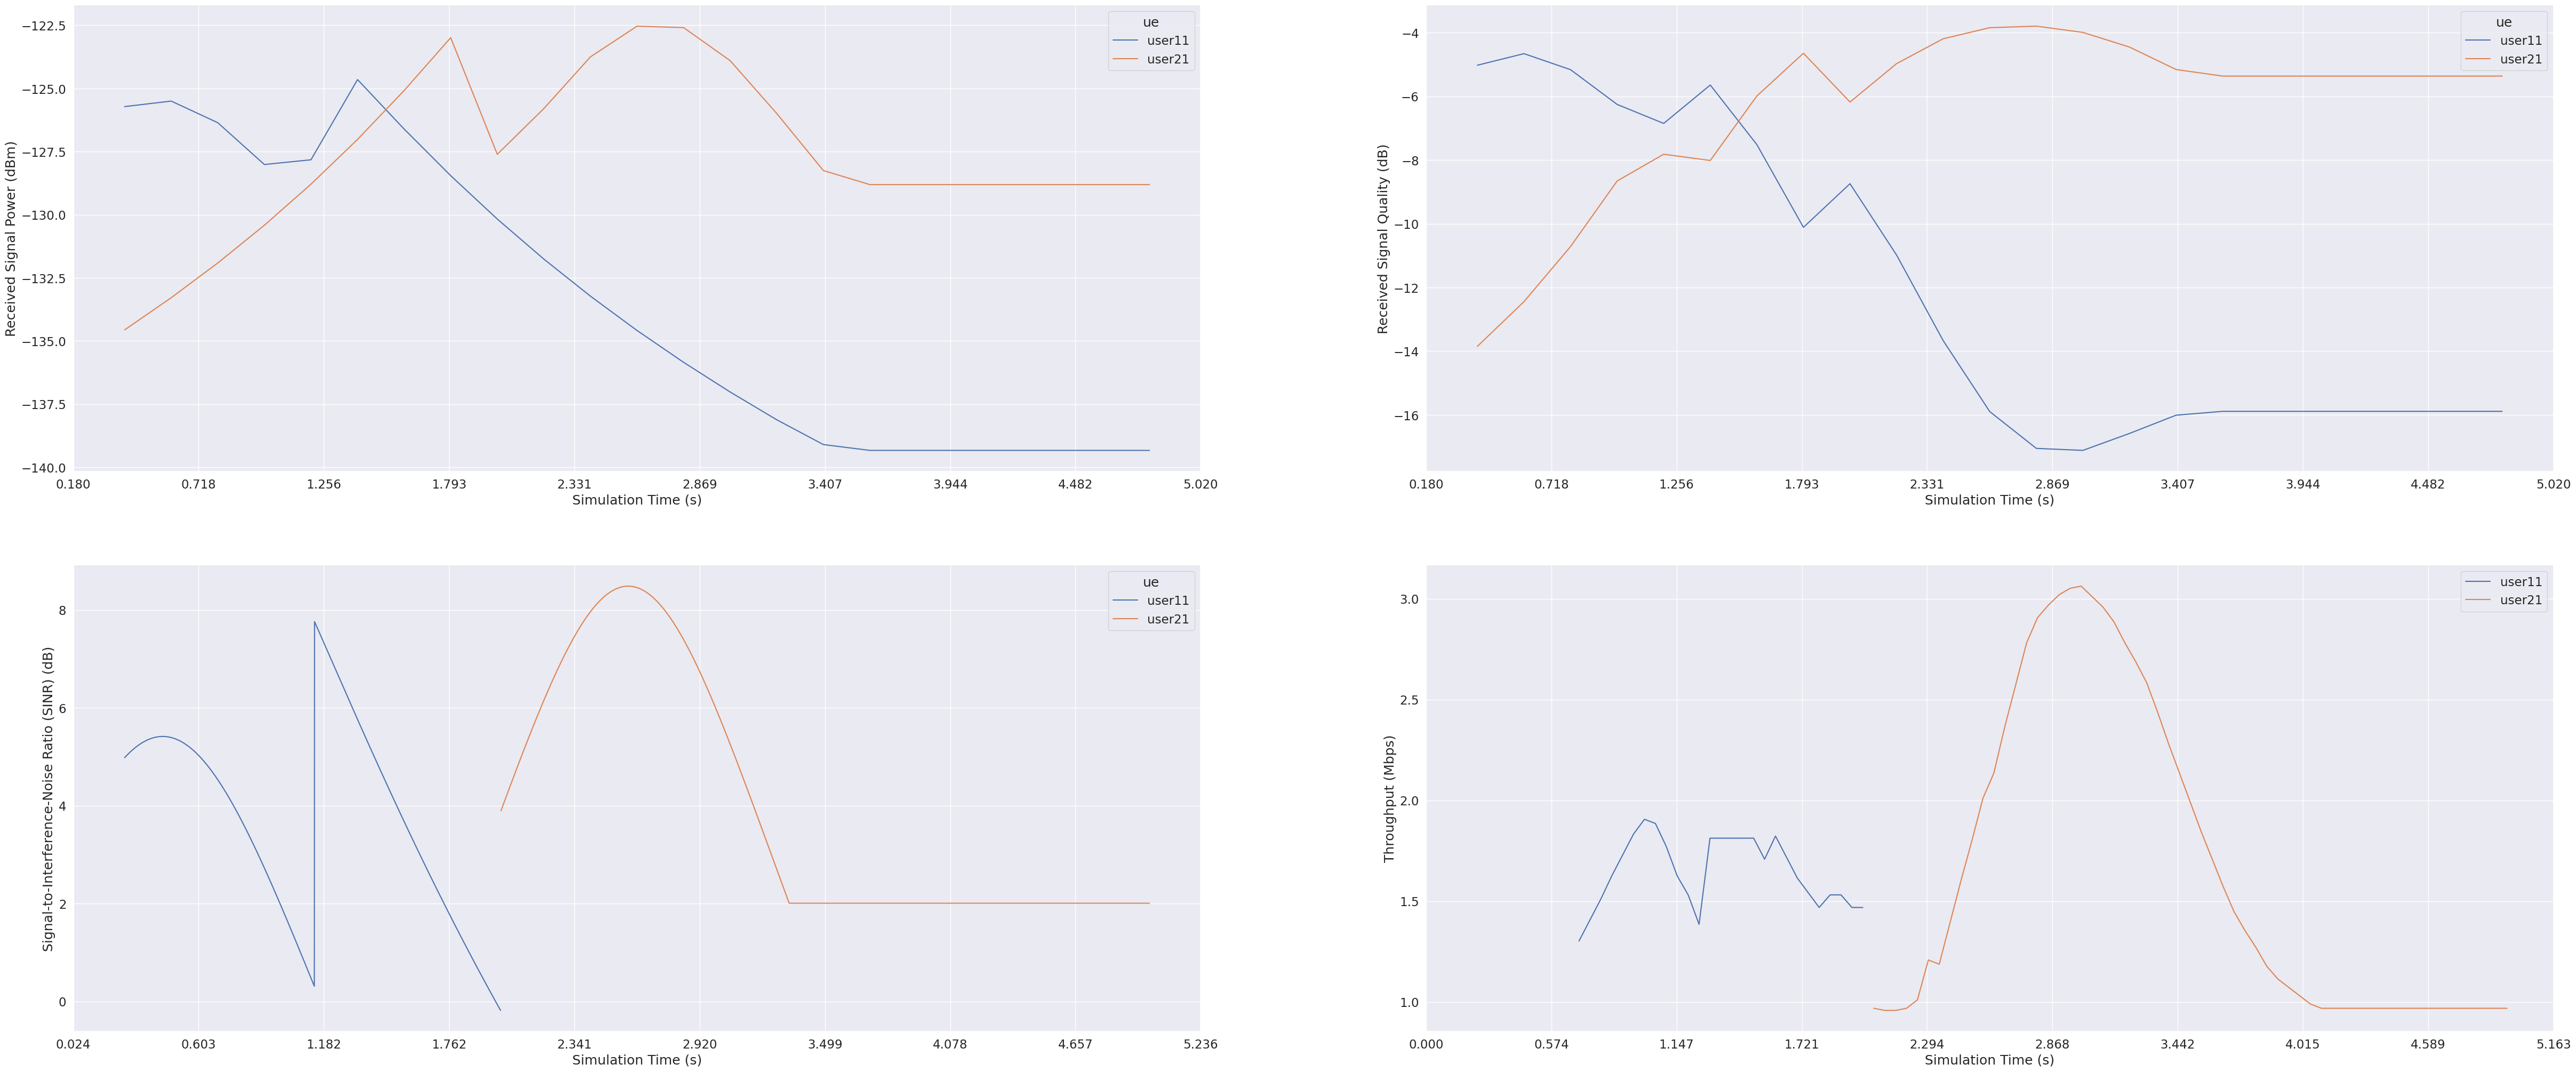

In [12]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 5.3 Results

The results provide us with valuable insight with respect to the performance of a mobile UE as it traverses through the coverage area of the serving cell to a neighboring cell as channel model changes due to clutter differences in the coverage area. Various aspects are covered for the simulated network by the following exercises: 

### <u>Exercises</u>

#### Q5.3.1: What type of behavior do you expect from the measurements when the UE moves behind the building. Is this occurring in the simulation?
> Hint: Compare both the cases with and without building to see if there are unexpected dips in throughput even though user is close to the eNB.
> To check: Try changing the location of buildings to see if it has an impact. 

<b><u>Answer:</u></b>
That the RSRP/RSRQ to the eNB becomes worse, worsening the throughput and the SINR
We dont see a clear moment in the graph where the UE is behind any building, but we can see that the overall signal power in scenario 1 is higher than the signal with the houses.
Scenario 1 has the max measured power peaks around -123 dBm while scenario 2 has the peaks around -125dBm. We see similar results on the other graphs aswell. However, the throughput graph is heavily reduced while the UE is in cell1.


#### Q5.3.2: What parameters can be adjusted to optimize the handover performance in a scenario where there are lot of buildings and obstacles? How should they be adjusted?
> Note: By optimization, it is meant that only necessary handovers are performed, and unnecessary handovers are avoided. 

<b><u>Answer:</u></b>
In this scenario it would be optimal to have high hysteresis and low TTT
When there are a lot of buildings and obstacles the TTT can be lowered to make the connection more sensitive to UE's moving around corners to connect to a new eNB.
The hysteresis however should be high, this would ensure that we dont have flapping between cells.
Antenna height and direction could also be adjusted to improve coverage in areas with obstacles. The directional antenna could for instance point down a street or similar.

#### Q5.3.3: What impact can buildings have on signal propagation? How can this be observed in the throughput results?
> Hint: Important to consider the many short variations and more than coverage between the buildings.

<b><u>Answer:</u></b> 
Buildings may block the direct LOS between the UE and the eNB, in other cases they cause interference and multipath propagation. All of these negatively influence the signal reception at both ends. Buildings are only positive for the signal propagation if they have a base station on top of them. 
On the other hand it is possible that long connected buildings direct the signal and actually make it propagate better to areas that won't have coverage in other cases. Lower frequencies are less impacted by buildings as they can penetrate obstacles more easily.

In our simulation we observe that the throughput from eNB1 is way worse than the throughput from eNB2. This is probably because the first building is more in the way towards eNB1 than the second building towards eNB2.


---
---
### <span style="color:green"> Milestone 3 </span>

Before proceeding, **call a TA** to make sure everything went as expected.

---
---

## 6. <span style="color:red"> *Task#4: Impact of Carrier Frequency and Bandwidth* </span>
This task covers the concepts of differentiation in bandwidth and center frequencies for different eNBs. This is achieved by creating a 2 cell topology and allocation of carrier bandwidths to each eNB. The impact of this allocation will be observable through the measured UE throughput for different users in the coverage area of both eNBs.  This task consists of 2 scenarios for comparing the usage of similar and different carrier frequency and bandwidth.
> Note: In LTE, same carrier freqeuncies are almost never used but we have presented a scenario to discuss the reasons for this choice.

### 6.1 Carrier frequency and Bandwidth in LTE
In this task, we utilize different LTE bands for the two eNBs in the topology along with different allocation of bandwidth values selected from the the <b>Table 5.7.3-1</b> <a href="#References">[5]</a>. The carrier frequency bands chosen for eNBs are 1 and 2 from the specified table which implicates the following frequency bands for the downlink and uplink channels:

#### <u>Band 1 Values</u>
- Downlink Carrier Frequency: 2120
- Uplink Carrier Frequency: 1930

#### <u>Band 2 Values</u>
- Downlink Carrier Frequency: 1950
- Uplink Carrier Frequency: 1870

These values are selected inside the ns-3 script so there is no need to configure them here.

### <a id='t4-scenario1'> <span style="color:blue"> *Scenario 1: Same Carrier frequency and Bandwidth* </span></a>
The topology shown in <a id='fig8'>[Figure. 8](#fig8)</a> consists of a mobile UE moving between coverage regions of both eNB.
| |
|---|
|![lab5-task4-top.png](Figures/lab5-task4-top.png) |  
<a id='fig8'><p style="text-align: center;"><b>[Figure. 8: A multicellular mobility and HO scenario.](#fig8)</b></p></a>

### 6.2 Use a different python script
The python code in <b>lab5-init-bw.py</b> uses a different set of command line arguments to provide the necessary information regarding carrier frequency and bandwidth to the LTE network topology to be designed in ns-3. The parameters required are listed as follows along with their recommended values: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b> bandwidth for eNB1</b> (10)
- <b> bandwidth for eNB2</b> (3)
- <b> enable different center frequencies</b> (no)
- show topology (yes or no)
 
The values of bandwidth will set up the number of available resource blocks (RB) that can be used for carrying data in the physical layer. The higher the value, more RBs will be made available. 

In [13]:
%run -i 'Modules/lab5-init-bw.py'

List of created simulations: 
 
mobileUE2
5buildings
5
5buildings2
mobileUE1



List the simulation to run:  mobileUE2



Please enter the following required parameters:
Enter the channel bandwidth for 1st eNB (valid values in MHz: 1.4,3,5,10,15,20)


 10


Enter the channel bandwidth for 2nd eNB (valid values in MHz: 1.4,3,5,10,15,20)


 3


Enable different carrier frequencies in eNBs (yes OR y OR no OR n):


 no


Channel bandwidth for the eNBs is (MHz):  10.0 3.0


Show a picture of the topology? (y/n) y


Generating topology pictures...


<img src="./Figures/GeneratedImages/image mobileUE2.png" alt = "test pic" style="background-color: white;"> 

RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.24s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.36s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.25s/simulation]

Simulation 3 finished!


In [15]:
%run -i 'Modules/lab5-dataPre.py'

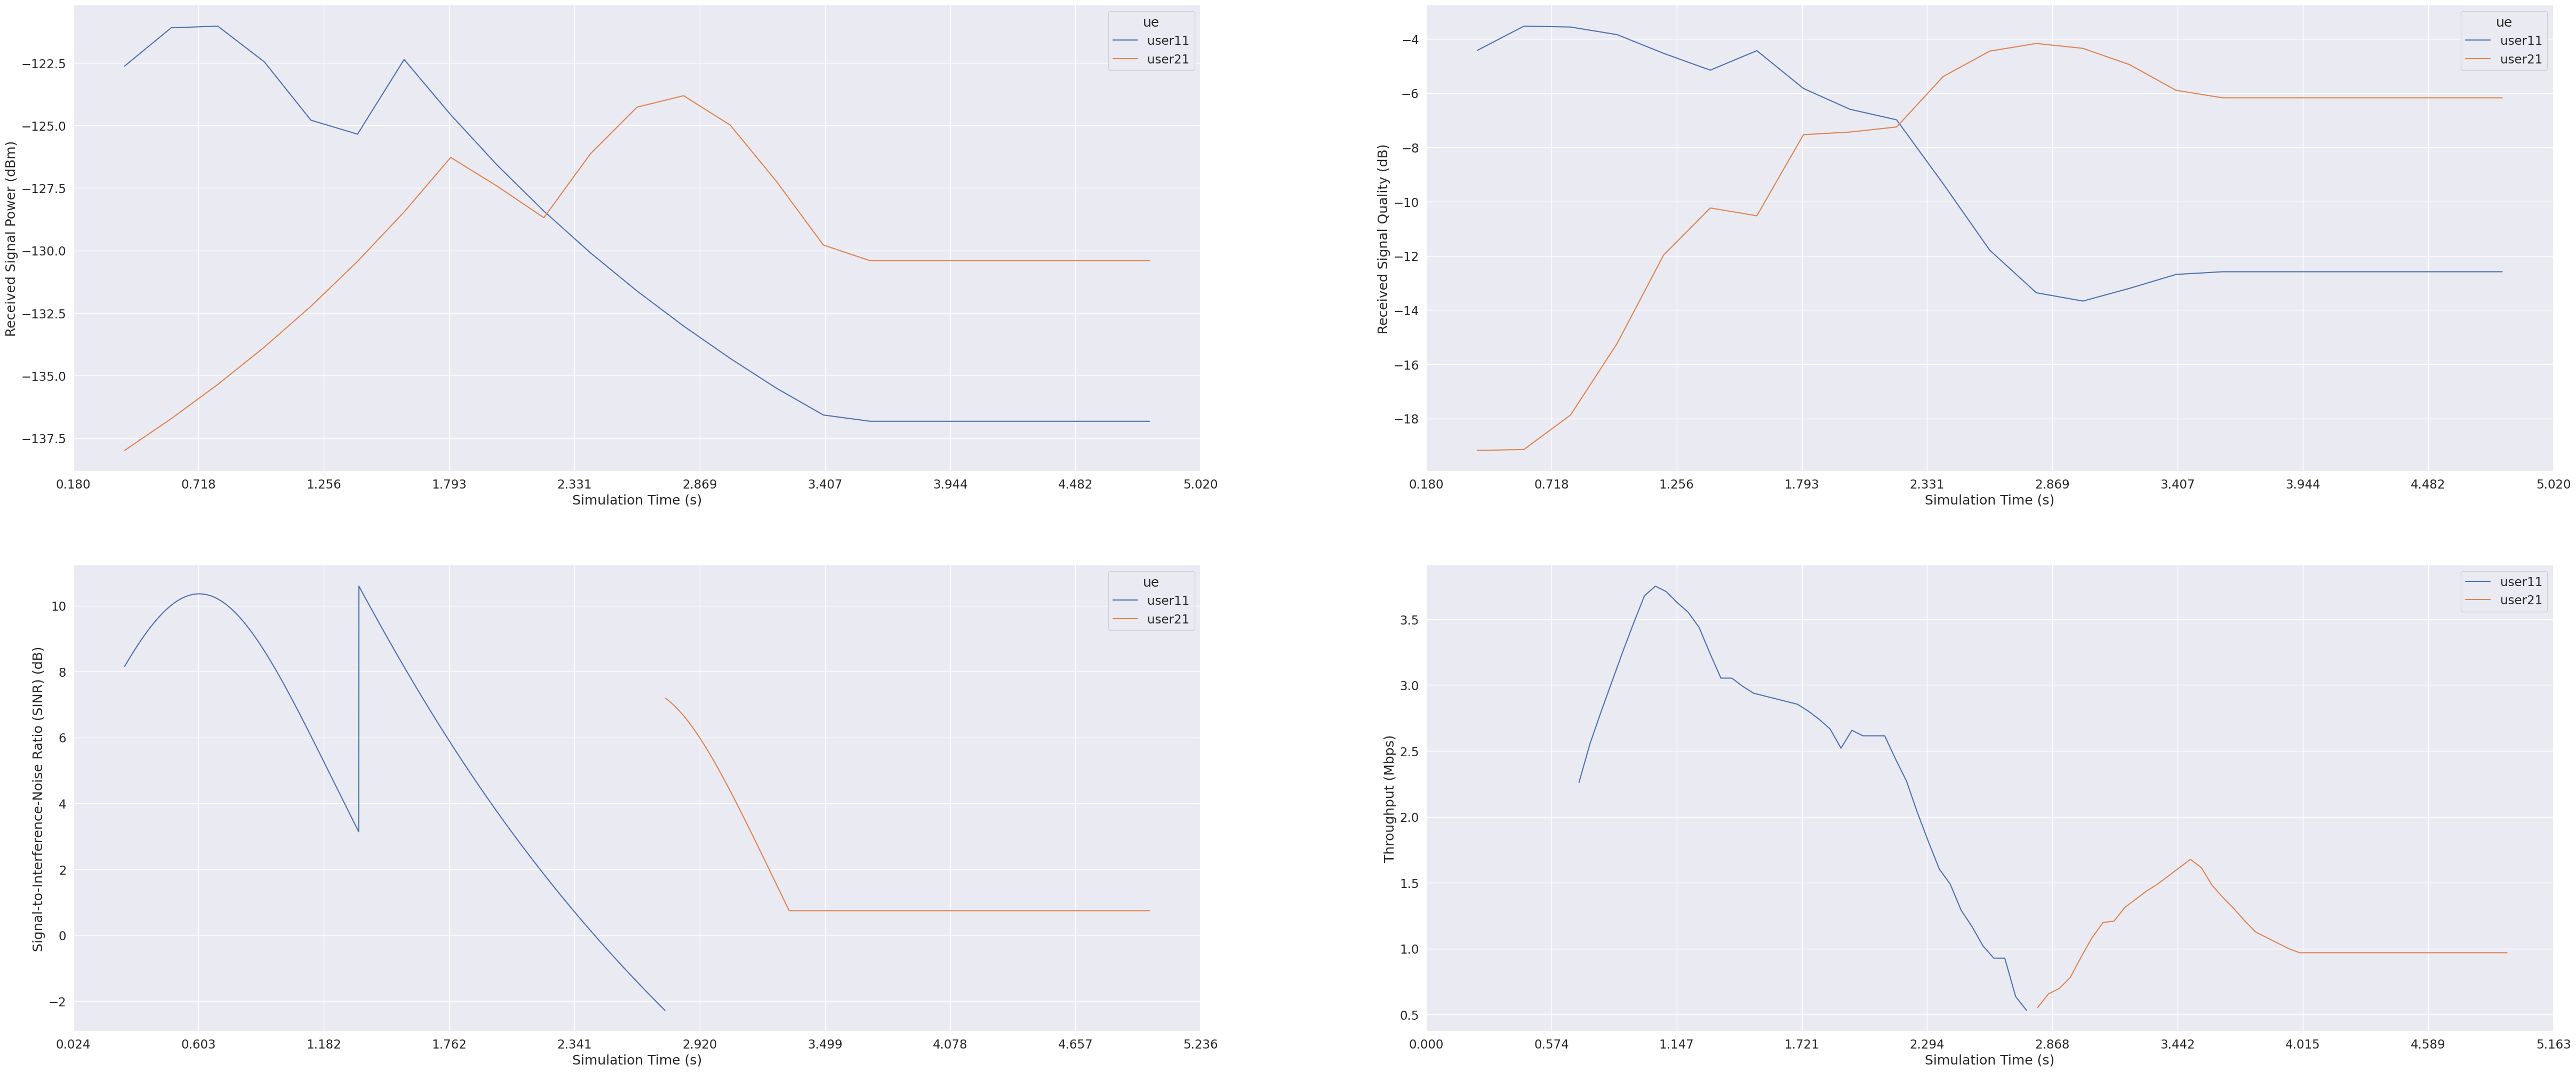

In [16]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 6.3 Results

The results provide the observed values for RSRP, RSRQ, SINR and measured throughput for the mobile user as it traverses two eNBs with similar available resources (bandwidth). The results should be analyzed in the light of the following exercises:

### <u>Exercises</u>

#### Q6.3.1: Consider the throughput graph for the UE, what is the result of the difference in badnwidths, between the eNBs?

<b><u>Answer:</u></b>
Since the eNB2 has a way smaller bandwith than eNB1 we see the same in throughput. Cell 2 provide maximum of 1.6 Mbps while cell1 provide a max of 3.7 Mbps.


#### Q6.3.2: Why is using different center frequencies important in cellular networks across different cells? 

<b><u>Answer:</u></b>
By using different center frequencies, the signals from adjacent cells are less likely to overlap, reducing the risk of interference and improving the overall network performance.


### <a id='t4-scenario2'> <span style="color:blue"> *Scenario 2: Different Carrier frequency and Bandwidth* </span></a>
### 6.4 Use a different python script
The python code in <b>lab5-init-bw.py</b> uses a different set of command line arguments to provide the necessary information regarding carrier frequency and bandwidth to the LTE network topology to be designed in ns-3. The parameters required are listed as follows along with their recommended values: 

- name of the simulation topology file (saved in the react interface and selectable from the list of available topology files)
- <b>bandwidth for eNB1</b> (10)
- <b>bandwidth for eNB2</b> (3)
- <b>enable different center frequencies</b> (yes)
- show topology (yes or no)

The values of bandwidth will set up the number of available resource blocks (RB) that can be used for carrying data in the physical layer. The higher the value, more RBs will be made available. 

In [23]:
%run -i 'Modules/lab5-init-bw.py'

List of created simulations: 
 
mobileUE2
5buildings
5
5buildings2
mobileUE1



List the simulation to run:  mobileUE2



Please enter the following required parameters:
Enter the channel bandwidth for 1st eNB (valid values in MHz: 1.4,3,5,10,15,20)


 10


Enter the channel bandwidth for 2nd eNB (valid values in MHz: 1.4,3,5,10,15,20)


 3


Enable different carrier frequencies in eNBs (yes OR y OR no OR n):


 yes


Channel bandwidth for the eNBs is (MHz):  10.0 3.0


Show a picture of the topology? (y/n) yes


RSRP and RSRQ simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.38s/simulation]


Simulation 1 finished!
SINR simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.41s/simulation]


Simulation 2 finished!
Throughput simulation running...


Running simulations: 100%|██████████| 1/1 [00:01<00:00,  1.28s/simulation]

Simulation 3 finished!


In [24]:
%run -i 'Modules/lab5-dataPre.py'

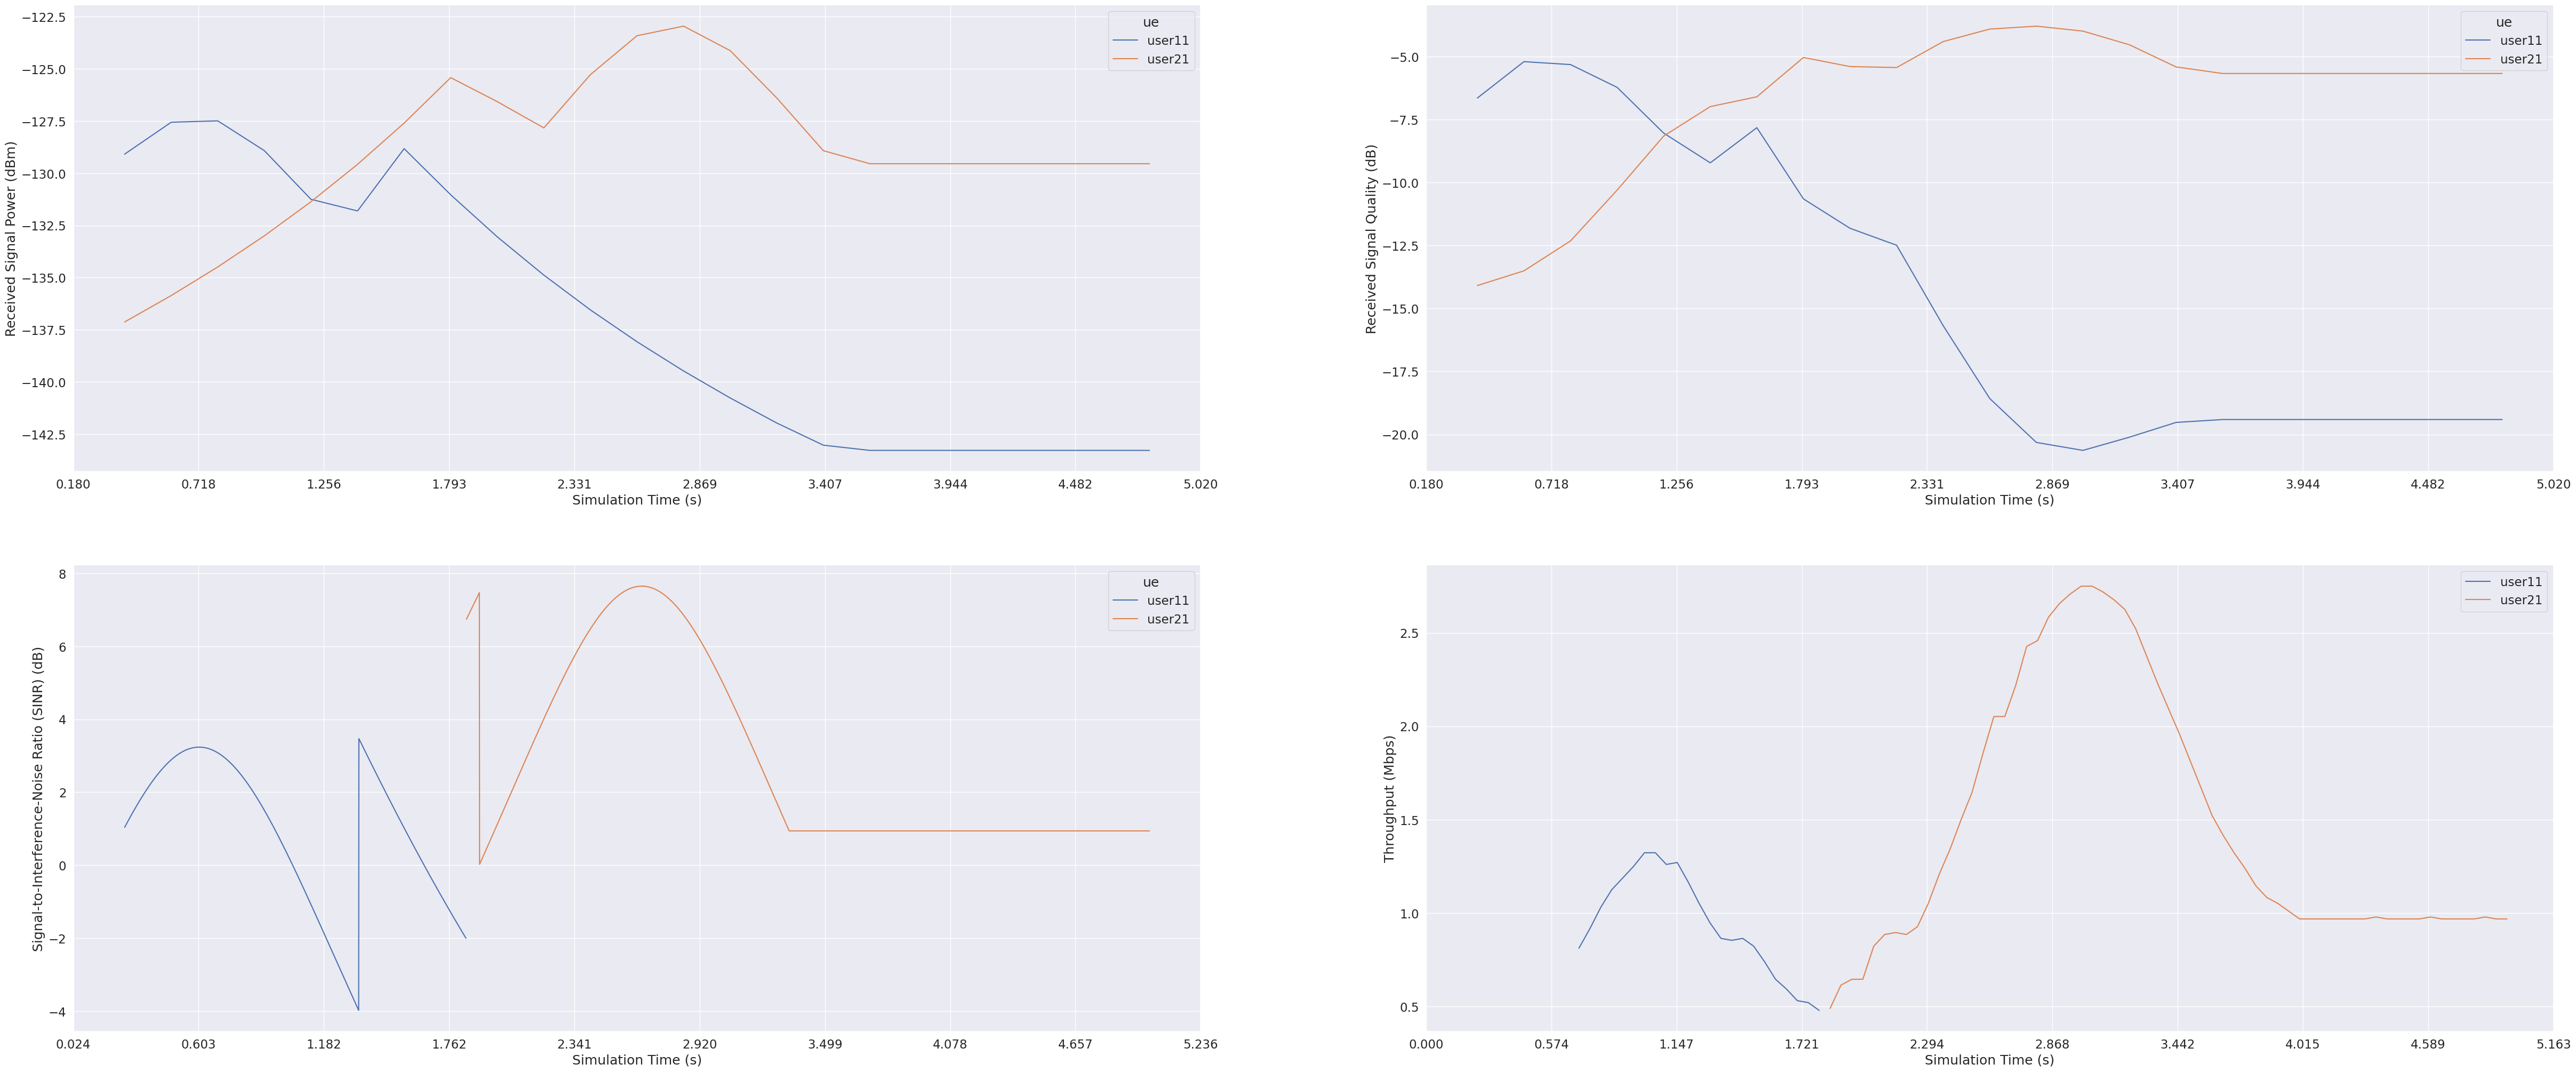

In [25]:
# for plotting code
sns.set(font_scale=1.5)
fig, axes = plt.subplots(2, 2, figsize=(60,25))

snsp1 = sns.lineplot(ax=axes[0,0], data=res_signalpower, x='time', y='sig_power', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Power (dBm)')

snsp1 = sns.lineplot(ax=axes[0,1], data=res_signalpower, x='time', y='sig_quality', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Received Signal Quality (dB)')

snsp1 =  sns.lineplot(ax=axes[1,0],data=res_sinr, x='time', y='sinr', hue='ue', errorbar=None)
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set( xlabel='Simulation Time (s)', ylabel='Signal-to-Interference-Noise Ratio (SINR) (dB)')


snsp1 = sns.lineplot(ax=axes[1,1], data=res_throughput, x='time', y='tput', hue='ue', errorbar=None, sort=False) # repeat for the number of users in the topology
snsp1.set( xlabel='Simulation Time (s)', ylabel='Throughput (Mbps)')
snsp1.xaxis.set_major_locator(ticker.LinearLocator(10))
snsp1.set(xlim=(0, None))
snsp1.legend()

plt.show()

sns.reset_orig()

### 6.5 Results

The results provide the observed values for RSRP, RSRQ, SINR and measured throughput for the mobile user as it traverses two eNBs with differing available resources (bandwidth). The results should be analyzed in the light of the following exercises:

### <u>Exercises</u>

#### Q6.5.1: Compare the two scenarios, with the same or different carrier frequency, what changes in throughput can be observed?

<b><u>Answer:</u></b>
The throughput for the second eNB increases when we enable different carrier frequencies.
In the same simulation we see that the throughput for eNB1 decreases which does not make sense, we guess this is some randomness from the simulation.

#### Q6.5.2: What type of handover takes place in Scenarios 1 and 2?
> Hint: Choose from Soft or Hard handover types. Also specify X2 or S1 type of handover in both scenarios.

<b><u>Answer:</u></b>
It looks like X2 handovers in both scenarios as they happen quickly. They are hard handovers since we can observe a gap in the throughput when switching basestations.

#### Q6.5.3: What causes the difference in handover times in Scenarios 1 and 2?
> Hint: Keep in mind the mechanics of the handover process.

<b><u>Answer:</u></b>
It looks like the handover in scenario 2 happens earlier than in scenario 1. The RSRP from the two basestations also crosses later on. We can see a similar TTT and hysteresis in the two scenarios. The reason the handover in scenario 2 is earlier could be that the carrier frequency of cell 2 reaches further into cell 1 because carrier frequencies are not interfering with each other. Thus, the handover decision is taken earlier. One frequency may experience more noise than the other.

#### Q6.5.4: Explain the observed results for RSRP, RSRQ, SINR, and throughput by summarizing the important trends? How can the differences between the scenarios 1 and 2 can be explained?
> Hint: For example, if the value of SINR decreased for one eNB, then what can be the reason for that decrease needs to be mentioned and so on.

<b><u>Answer:</u></b>
The SINR for eNB1 severely decreased, this is probably because the carrier frequency of eNB2 is different and not interfering as much with eNB1s signal. eNB2 SINR is about the same in both scenarios.
RSRP for eNB2 in the second scenario rises way quicker than in the first scenario, this is probably because the different carrier frequency is reaching further into cell1. The RSRP for cell1 is lower in scenario 2, but it should not be the case as the bandwith is bigger than eNB2 and the interference should also be lower. Probably some randomness in the simulation.
In the RSRQ we see the same trend as in RSRP.
In the throughput we see that eNB2 has a way higher throughput in scenario 2 since there is less interference between the two cells. However, for cell1 we see the opposite trend which we also think is some randomness in the simulation. It would make more sense if the throughput in cell 1 also got higher in scenario2.

---
---
### <span style="color:green"> Milestone 4 </span>

At the end, **call a TA** to make sure everything went as expected.

---
---

# References

[1] "From GSM to LTE-Advanced Pro and 5G, An introduction to Mobile Networks and Mobile Broadband", Martin Sauter, 4th Edition, 2021

[2] "Evolved Universal Terrestrial Radio Access (E-UTRA); Radio Resource Control (RRC); Protocol specification", 3GPP. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2440 (Accessed: 15-02-2023)

[3] "Handover Event LTE", 4G/LTE-Measurement. Online: https://www.thinkcorpindonesia.com/handover-event-lte/https://www.thinkcorpindonesia.com/handover-event-lte/ (Accessed : 16-02-2023)

[4] Marwat, S.N.K., Meyer, S., Weerawardane, T. and Goerg, C. (2014), Congestion-Aware Handover in LTE Systems for Load Balancing in Transport Network. ETRI Journal, 36: 761-771. https://doi.org/10.4218/etrij.14.0113.1034Marwat, S.N.K., Meyer, S., Weerawardane, T. and Goerg, C. (2014), Congestion-Aware Handover in LTE Systems for Load Balancing in Transport Network. ETRI Journal, 36: 761-771. https://doi.org/10.4218/etrij.14.0113.1034

[5] "Evolved Universal Terrestrial Radio Access (E-UTRA); User Equipment (UE) radio transmission and reception", 3GPP. Online: https://portal.3gpp.org/desktopmodules/Specifications/SpecificationDetails.aspx?specificationId=2411 (Accessed: 15-03-2023)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------